
## RNN for data with time delays


In [1]:

import pandas as pd
import numpy as np


In [2]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

import matplotlib 
## import pytorch_lightning as pl
import torch 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


In [4]:

## Requires Python = 3.9


In [5]:

for_RNN_data_CIVS = pd.read_csv('RNN_time_DELAYS_265736_1h6hPreCast_rcalix.csv')


In [6]:

for_RNN_data_CIVS.head(5)


Unnamed: 0  SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  \
0           0  1.152  2021-08-01 00:00:00                8.084517   
1           1  1.152  2021-08-01 00:01:00                8.079545   
2           2  1.152  2021-08-01 00:02:00                8.074573   
3           3  1.152  2021-08-01 00:03:00                8.069602   
4           4  1.152  2021-08-01 00:04:00                8.064630   

   NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  \
0    158.478922    245.634175    145.396538    220.717349   
1    159.637733    252.459217    145.570895    226.360600   
2    160.796544    252.645736    145.745252    230.297540   
3    161.955355    247.987563    145.919609    225.220292   
4    163.102736    226.923719    146.093966    218.827693   

   Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  ...  Selec_Top_Gas_N2_f3  \
0            22.322068             18.729296  ...            54.250139   
1            22.335329             18.731320  ...            54.194257   
2            22.348590             18.733343  ...            54.138374   
3            22.361852             18.735367  ...            54.082797   
4            22.375113             18.737391  ...            54.063779   

   HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0          1999.604384   179.749638               2.510680           0.0   
1          2000.288837   179.765945               2.489381           0.0   
2          1999.242862   179.782251               2.489037           0.0   
3          1999.884442   179.798490               2.496867           0.0   
4          1999.849729   179.784430               2.501961           0.0   

   NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0            4034.234339           992           1.048           0.546   
1            4024.947376           992           1.048           0.546   
2            4011.601682           992           1.048           0.546   
3            4012.024633           992           1.048           0.546   
4            4000.467204           992           1.048           0.546   

   Slag_Fe_f2  
0        0.05  
1        0.05  
2        0.05  
3        0.05  
4        0.05  

[5 rows x 21 columns]

In [7]:

for_RNN_data_CIVS


Unnamed: 0     SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  \
0                0  1.152000  2021-08-01 00:00:00                8.084517   
1                1  1.152000  2021-08-01 00:01:00                8.079545   
2                2  1.152000  2021-08-01 00:02:00                8.074573   
3                3  1.152000  2021-08-01 00:03:00                8.069602   
4                4  1.152000  2021-08-01 00:04:00                8.064630   
...            ...       ...                  ...                     ...   
265731      265731  0.662065  2022-01-31 16:12:00                5.155158   
265732      265732  0.662446  2022-01-31 16:13:00                5.161362   
265733      265733  0.662826  2022-01-31 16:14:00                5.167567   
265734      265734  0.663207  2022-01-31 16:15:00                5.173771   
265735      265735  0.663587  2022-01-31 16:16:00                5.179976   

        NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  \
0         158.478922    245.634175    145.396538    220.717349   
1         159.637733    252.459217    145.570895    226.360600   
2         160.796544    252.645736    145.745252    230.297540   
3         161.955355    247.987563    145.919609    225.220292   
4         163.102736    226.923719    146.093966    218.827693   
...              ...           ...           ...           ...   
265731    168.935281    202.117809    163.555824    219.714757   
265732    170.715532    202.106673    164.493156    220.911245   
265733    172.495783    205.875063    165.430489    222.902059   
265734    174.440392    212.764586    166.688229    232.269437   
265735    178.348950    219.654109    170.012230    243.436510   

        Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  ...  Selec_Top_Gas_N2_f3  \
0                 22.322068             18.729296  ...            54.250139   
1                 22.335329             18.731320  ...            54.194257   
2                 22.348590             18.733343  ...            54.138374   
3                 22.361852             18.735367  ...            54.082797   
4                 22.375113             18.737391  ...            54.063779   
...                     ...                   ...  ...                  ...   
265731            20.510372             17.817248  ...            55.682915   
265732            20.510606             17.815391  ...            55.688159   
265733            20.510840             17.813534  ...            55.693057   
265734            20.511074             17.811677  ...            55.697567   
265735            20.511309             17.809820  ...            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4012.024633           992         

In [8]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

In [9]:
l_new = ['SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

In [10]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [11]:

for_RNN_data_CIVS 


SI_f1      MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  \
0       1.152000  2021-08-01 00:00:00                8.084517    158.478922   
1       1.152000  2021-08-01 00:01:00                8.079545    159.637733   
2       1.152000  2021-08-01 00:02:00                8.074573    160.796544   
3       1.152000  2021-08-01 00:03:00                8.069602    161.955355   
4       1.152000  2021-08-01 00:04:00                8.064630    163.102736   
...          ...                  ...                     ...           ...   
265731  0.662065  2022-01-31 16:12:00                5.155158    168.935281   
265732  0.662446  2022-01-31 16:13:00                5.161362    170.715532   
265733  0.662826  2022-01-31 16:14:00                5.167567    172.495783   
265734  0.663207  2022-01-31 16:15:00                5.173771    174.440392   
265735  0.663587  2022-01-31 16:16:00                5.179976    178.348950   

        SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  \
0         245.634175    145.396538    220.717349            22.322068   
1         252.459217    145.570895    226.360600            22.335329   
2         252.645736    145.745252    230.297540            22.348590   
3         247.987563    145.919609    225.220292            22.361852   
4         226.923719    146.093966    218.827693            22.375113   
...              ...           ...           ...                  ...   
265731    202.117809    163.555824    219.714757            20.510372   
265732    202.106673    164.493156    220.911245            20.510606   
265733    205.875063    165.430489    222.902059            20.510840   
265734    212.764586    166.688229    232.269437            20.511074   
265735    219.654109    170.012230    243.436510            20.511309   

        Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                  18.729296             3.559210            54.250139   
1                  18.731320             3.559234            54.194257   
2                  18.733343             3.559259            54.138374   
3                  18.735367             3.559284            54.082797   
4                  18.737391             3.559309            54.063779   
...                      ...                  ...                  ...   
265731             17.817248             4.376637            55.682915   
265732             17.815391             4.376798            55.688159   
265733             17.813534             4.376959            55.693057   
265734             17.811677             4.377119            55.697567   
265735             17.809820             4.377280            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3      

In [12]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265736 entries, 0 to 265735
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SI_f1                   265736 non-null  float64
 1   MM_Timestamp_f1         265736 non-null  object 
 2   HOST_BLAST_MOISTURE_f3  265736 non-null  float64
 3   NE_Uptake_f3            265736 non-null  float64
 4   SE_Uptake_f3            265736 non-null  float64
 5   NW_Uptake_f3            265736 non-null  float64
 6   SW_Uptake_f3            265736 non-null  float64
 7   Selec_Top_Gas_CO_f3     265736 non-null  float64
 8   Selec_Top_Gas_CO2_f3    265736 non-null  float64
 9   Selec_Top_Gas_H2_f3     265736 non-null  float64
 10  Selec_Top_Gas_N2_f3     265736 non-null  float64
 11  HOT_BLAST_TMP_NS_f3     265736 non-null  float64
 12  WINDRATE_f3             265736 non-null  float64
 13  HIGH_PURITY_OXYGEN_f3   265736 non-null  float64
 14  COAL_FLOW_f3        


## Plots


In [13]:

for_RNN_data_CIVS['MM_Timestamp_f1'] = for_RNN_data_CIVS['MM_Timestamp_f1'].astype("datetime64[ns]")

rc22 = for_RNN_data_CIVS['MM_Timestamp_f1'].astype("datetime64[ns]")


In [14]:

rc22


0        2021-08-01 00:00:00
1        2021-08-01 00:01:00
2        2021-08-01 00:02:00
3        2021-08-01 00:03:00
4        2021-08-01 00:04:00
                 ...        
265731   2022-01-31 16:12:00
265732   2022-01-31 16:13:00
265733   2022-01-31 16:14:00
265734   2022-01-31 16:15:00
265735   2022-01-31 16:16:00
Name: MM_Timestamp_f1, Length: 265736, dtype: datetime64[ns]

In [15]:

plt.rcParams["figure.figsize"] = [15, 5]


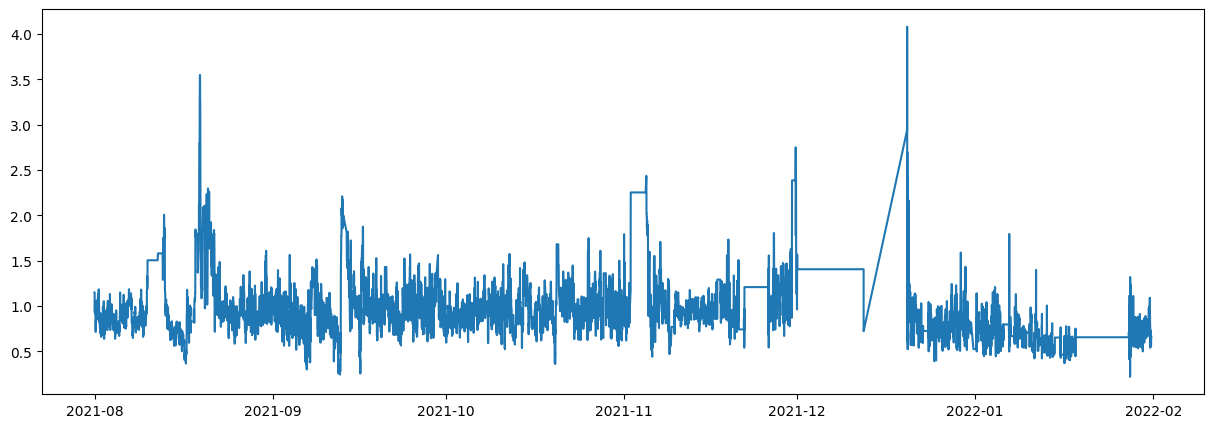

In [16]:

plt.plot(rc22, for_RNN_data_CIVS['SI_f1'])


array([<Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>], dtype=object)

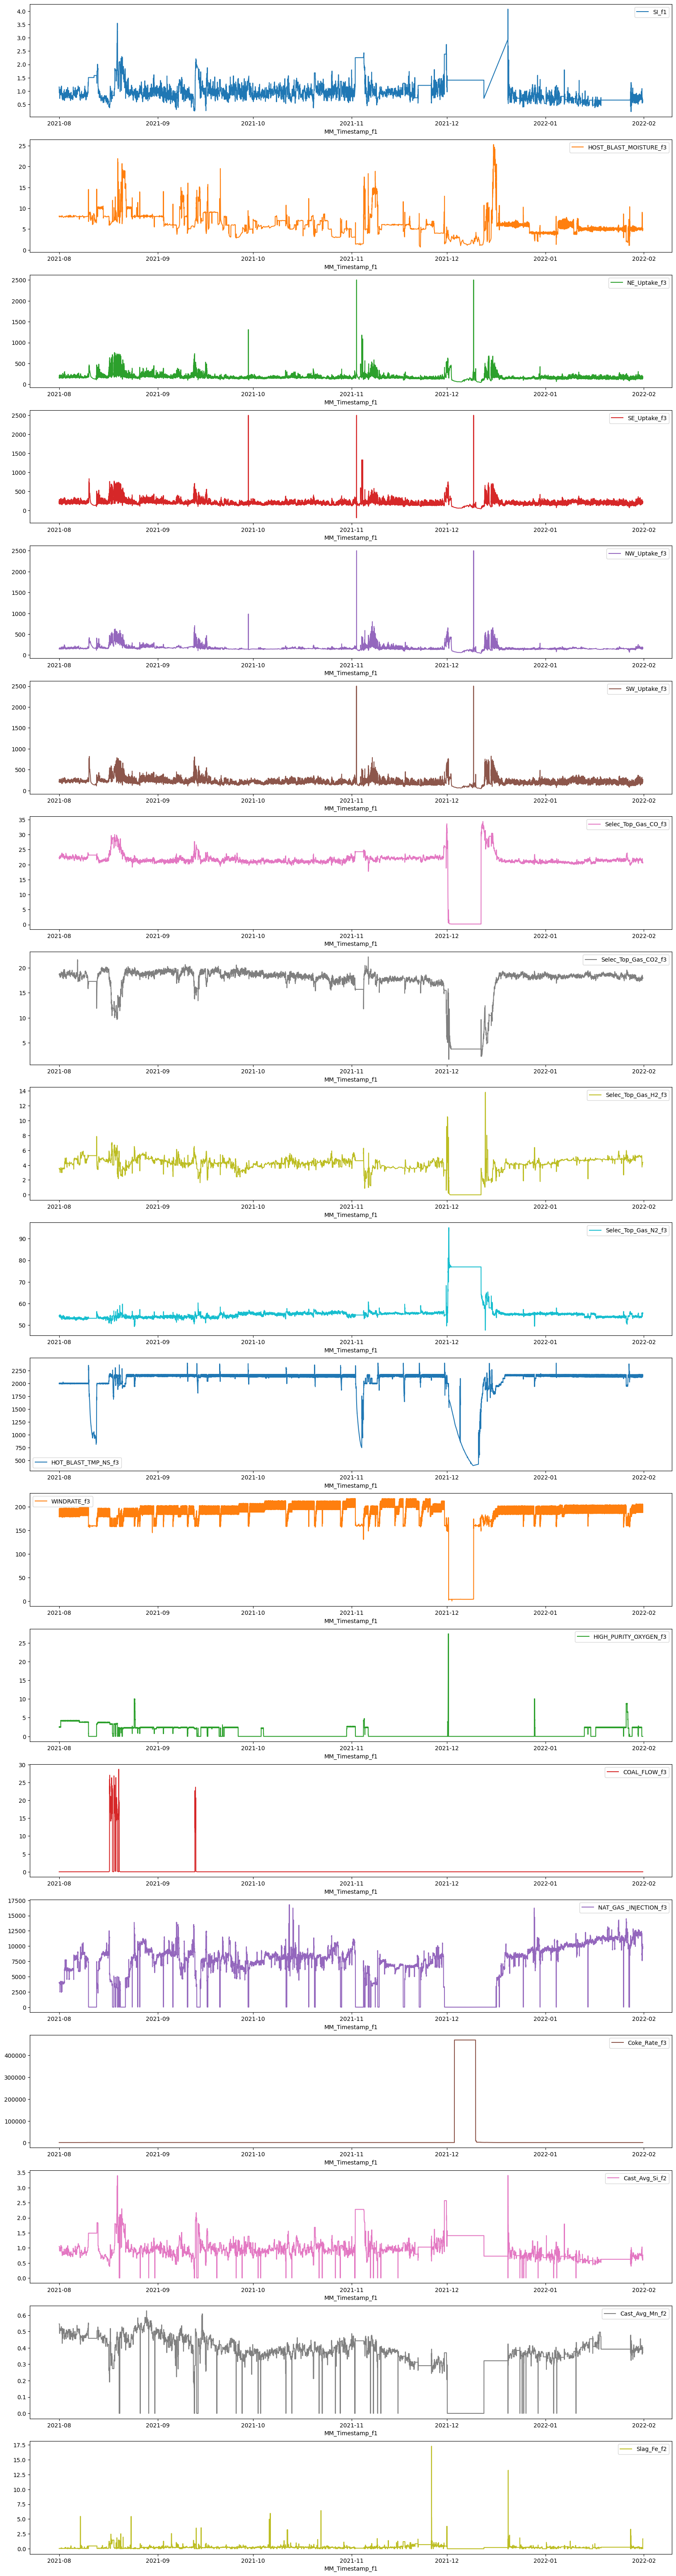

In [17]:

## layout=(4, 3), 
## style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r'],
## xticks=np.arange(0, len(df), 16)

## for_RNN_data_CIVS.plot( xticks=rc22, figsize=(20,80),  subplots=True   )


for_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [18]:

l_new


['SI_f1',
 'MM_Timestamp_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

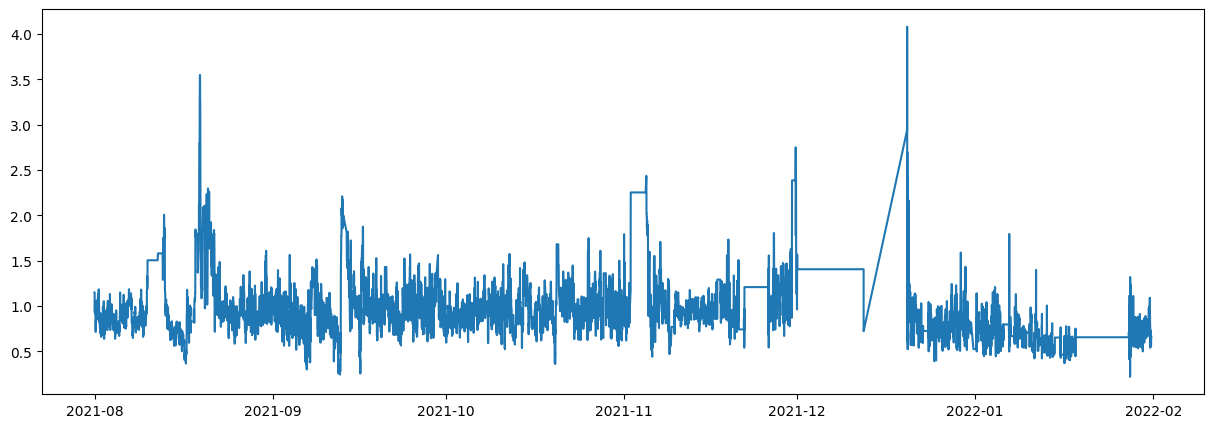

In [19]:

plt.plot(rc22, for_RNN_data_CIVS['SI_f1'])


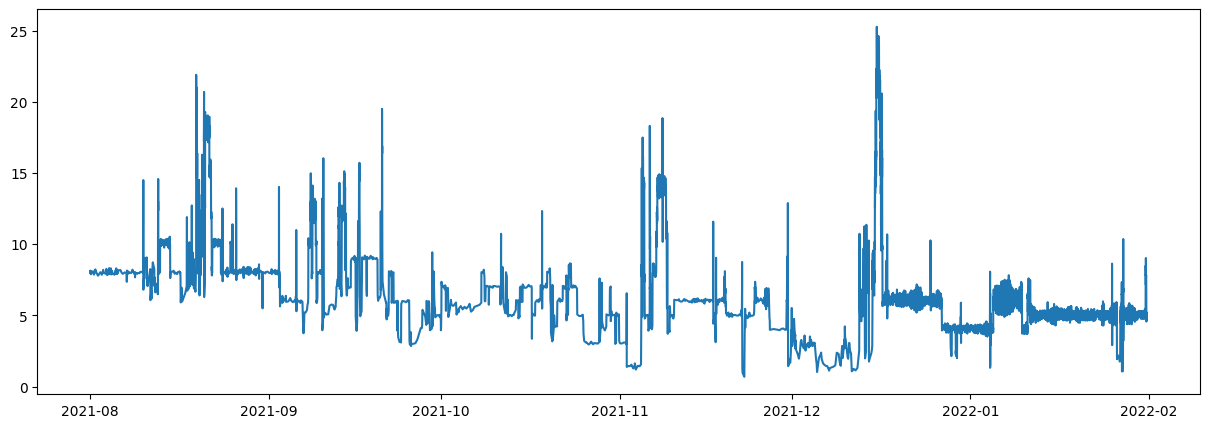

In [20]:

plt.plot(rc22, for_RNN_data_CIVS['HOST_BLAST_MOISTURE_f3'])


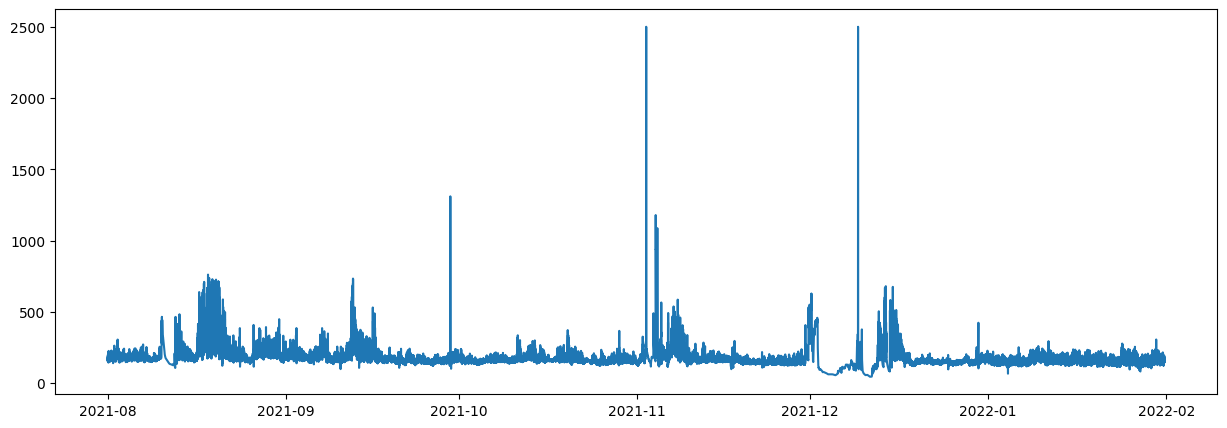

In [21]:

plt.plot(rc22, for_RNN_data_CIVS['NE_Uptake_f3'])


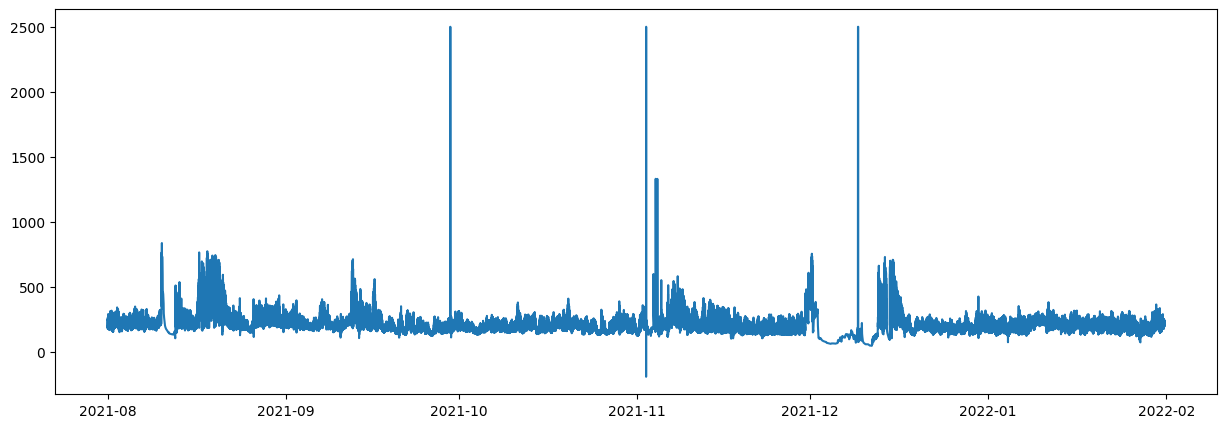

In [22]:

plt.plot(rc22, for_RNN_data_CIVS['SE_Uptake_f3'])


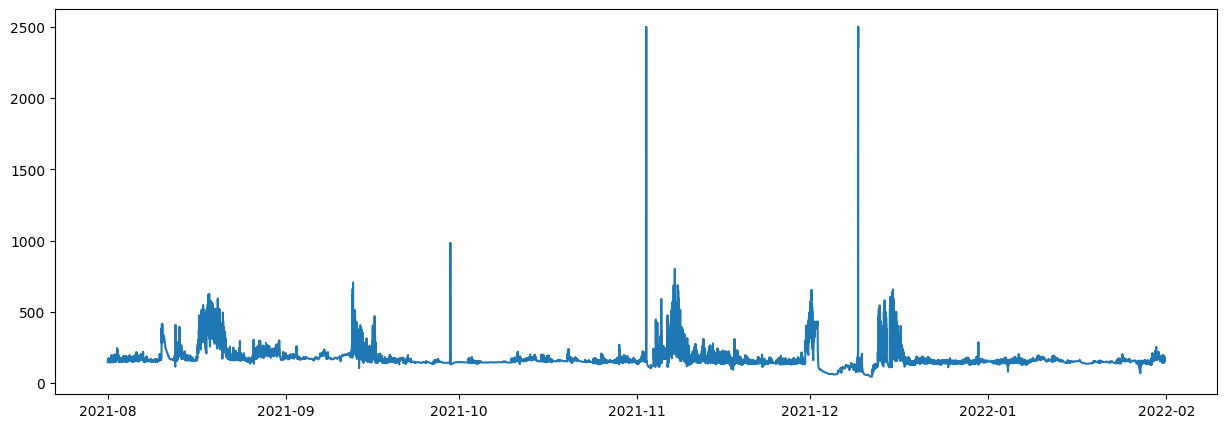

In [23]:

plt.plot(rc22, for_RNN_data_CIVS['NW_Uptake_f3'])


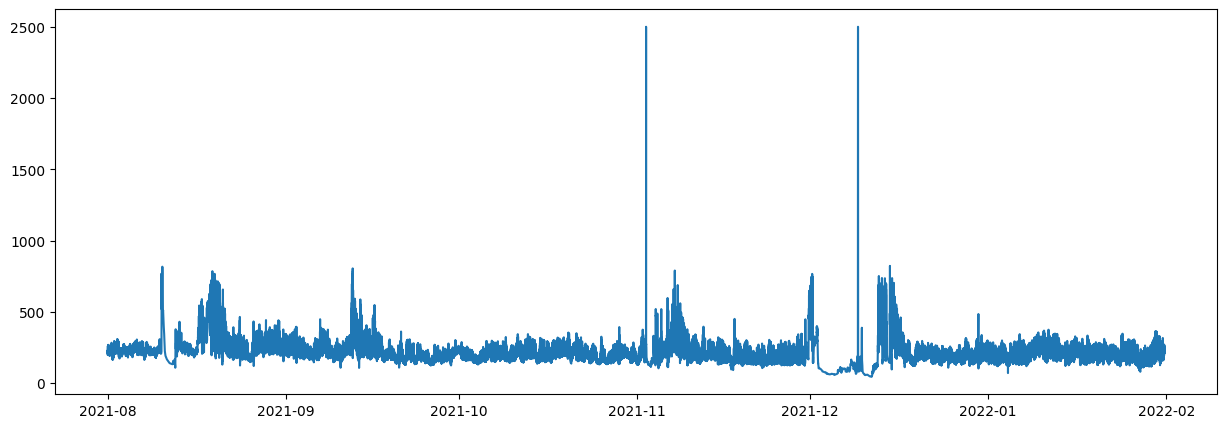

In [24]:

plt.plot(rc22, for_RNN_data_CIVS['SW_Uptake_f3'])


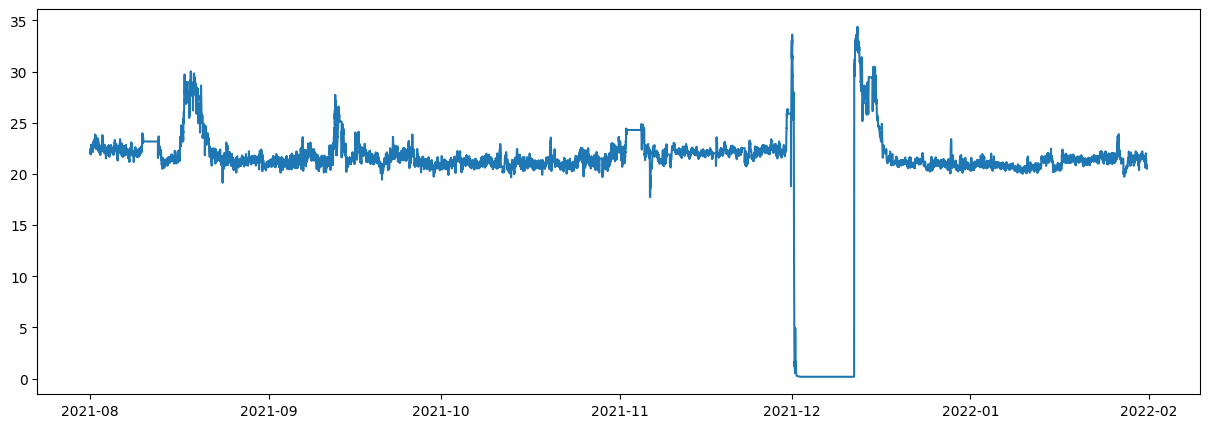

In [25]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_CO_f3'])


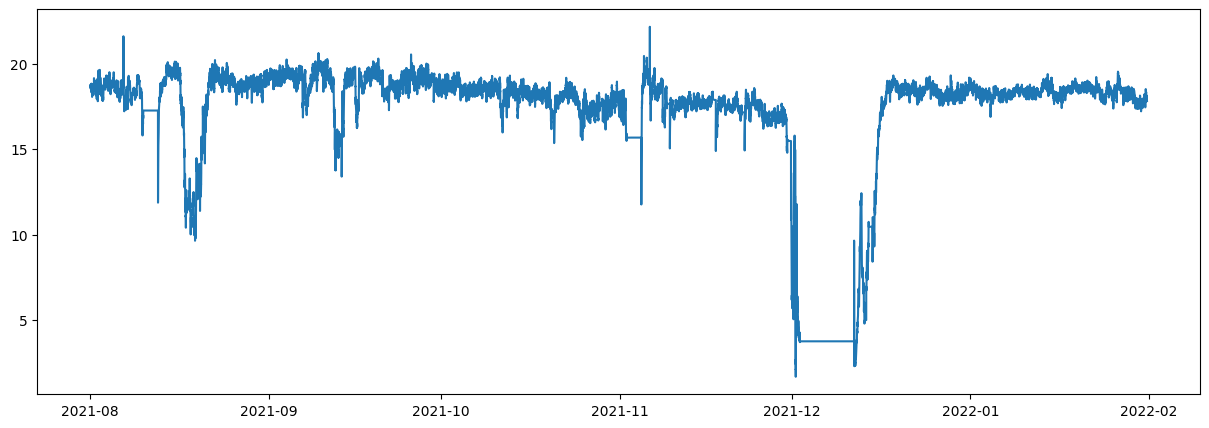

In [26]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_CO2_f3'])


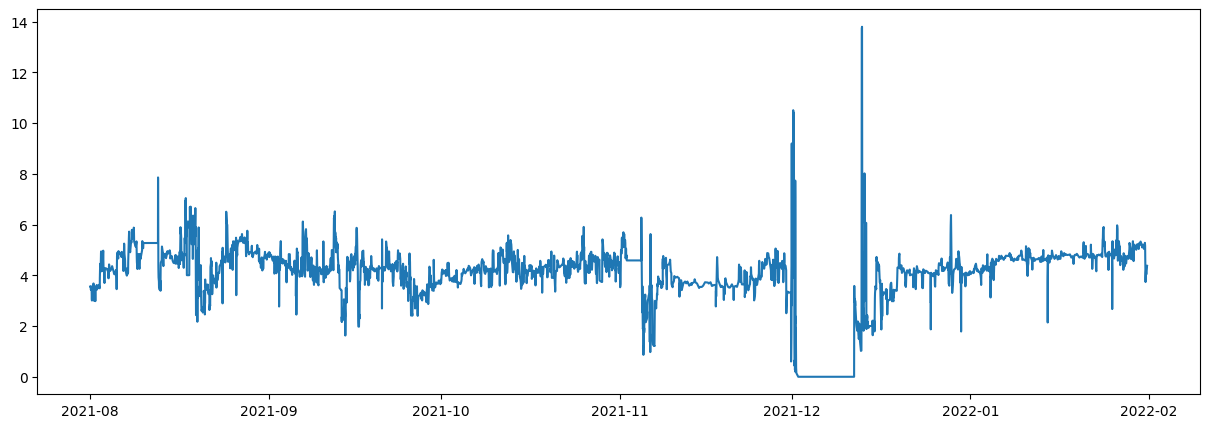

In [27]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_H2_f3'])


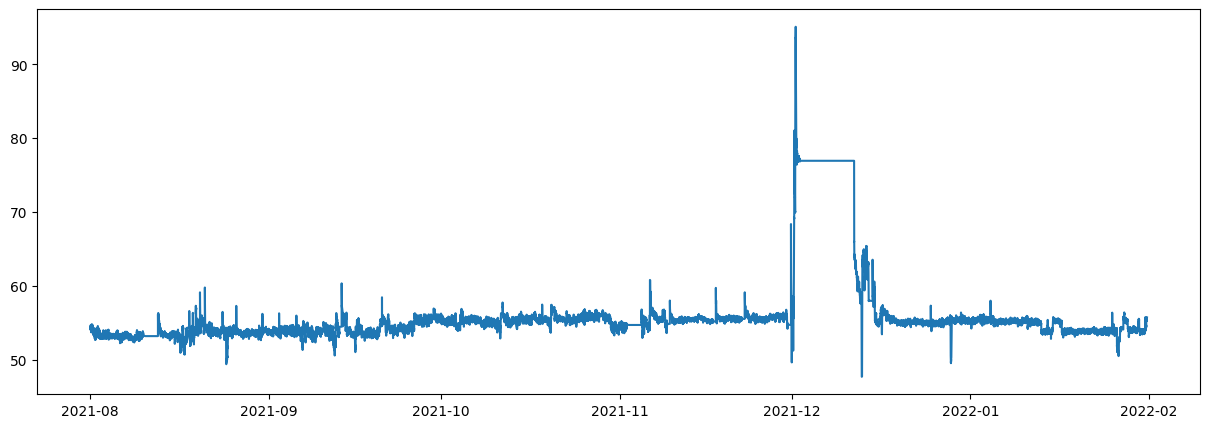

In [28]:

plt.plot(rc22, for_RNN_data_CIVS['Selec_Top_Gas_N2_f3'])


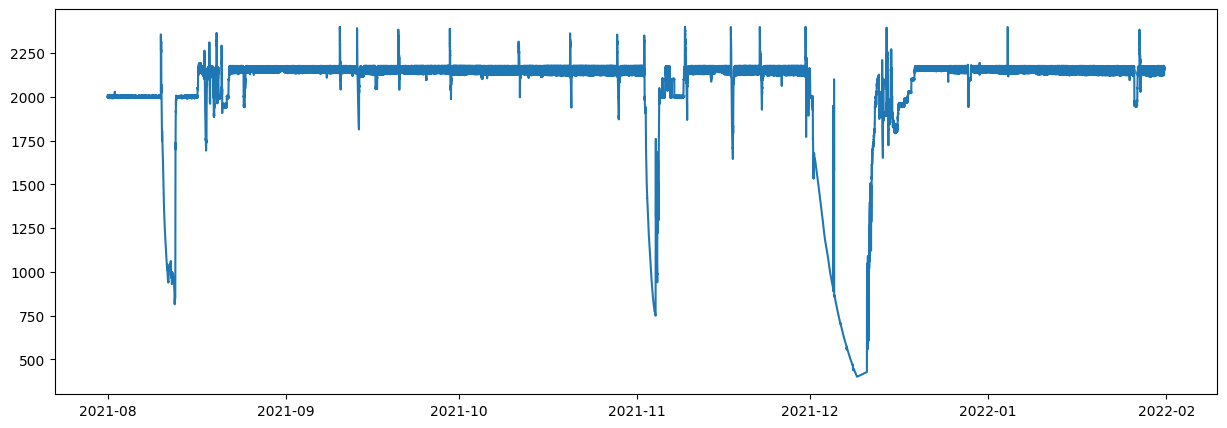

In [29]:

plt.plot(rc22, for_RNN_data_CIVS['HOT_BLAST_TMP_NS_f3'])


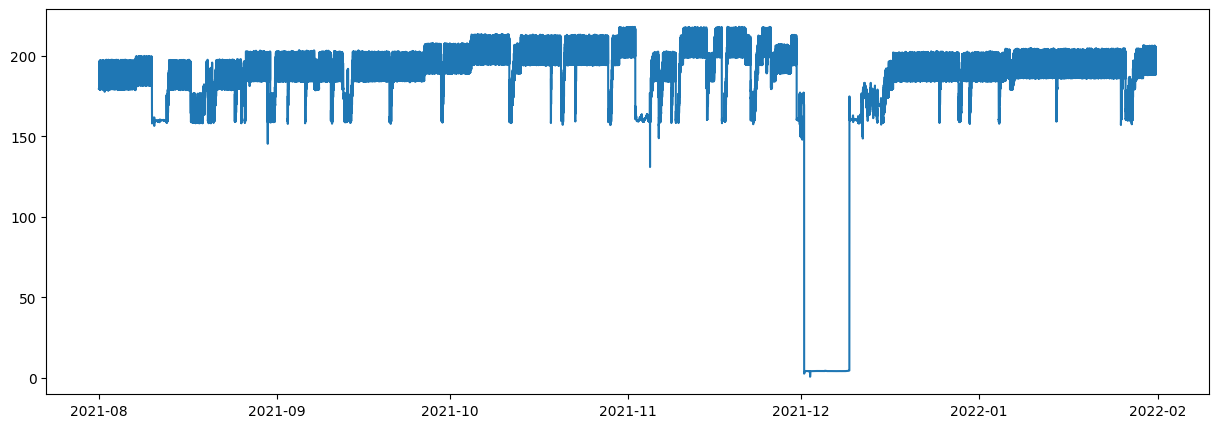

In [30]:

plt.plot(rc22, for_RNN_data_CIVS['WINDRATE_f3'])


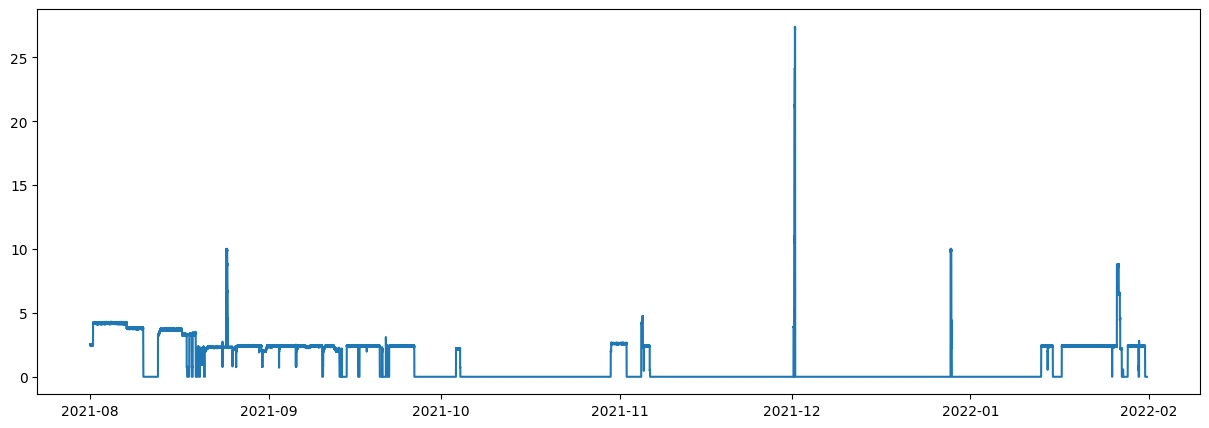

In [31]:

plt.plot(rc22, for_RNN_data_CIVS['HIGH_PURITY_OXYGEN_f3'])


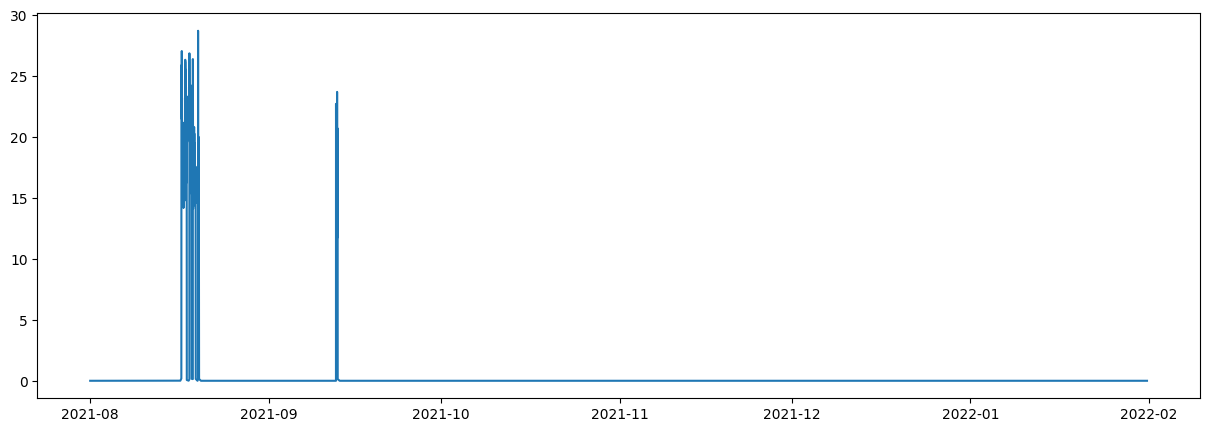

In [32]:

plt.plot(rc22, for_RNN_data_CIVS[ 'COAL_FLOW_f3'])


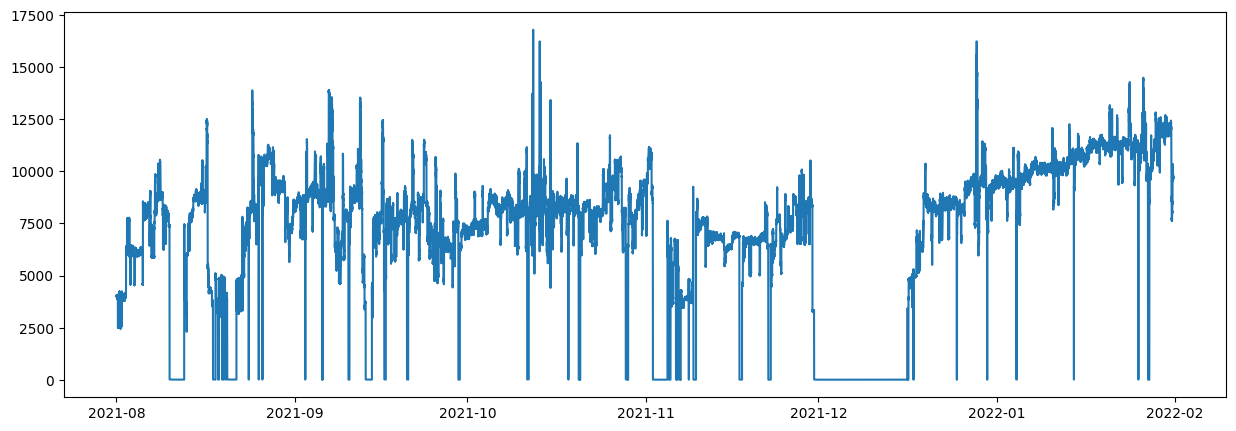

In [33]:

plt.plot(rc22, for_RNN_data_CIVS['NAT_GAS _INJECTION_f3'])


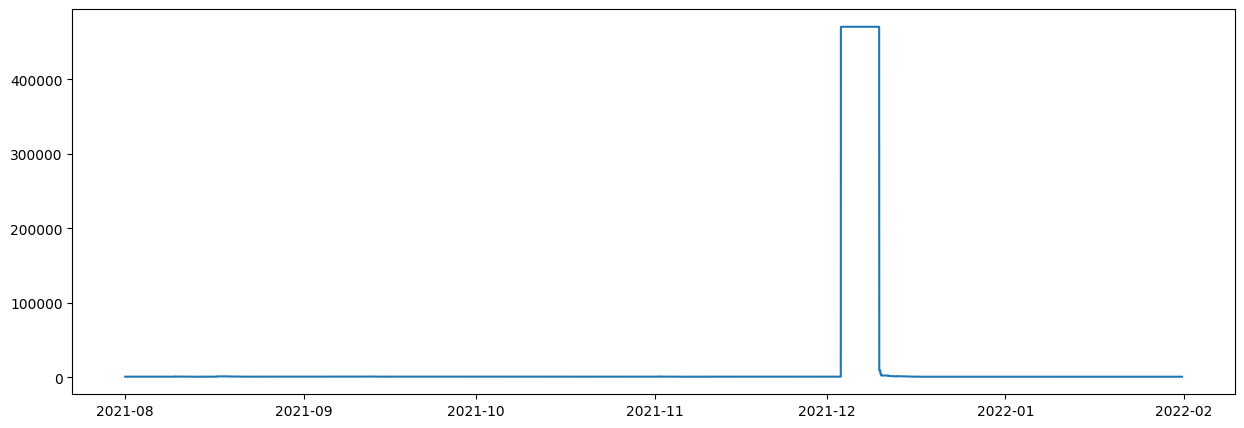

In [34]:

plt.plot(rc22, for_RNN_data_CIVS['Coke_Rate_f3'])


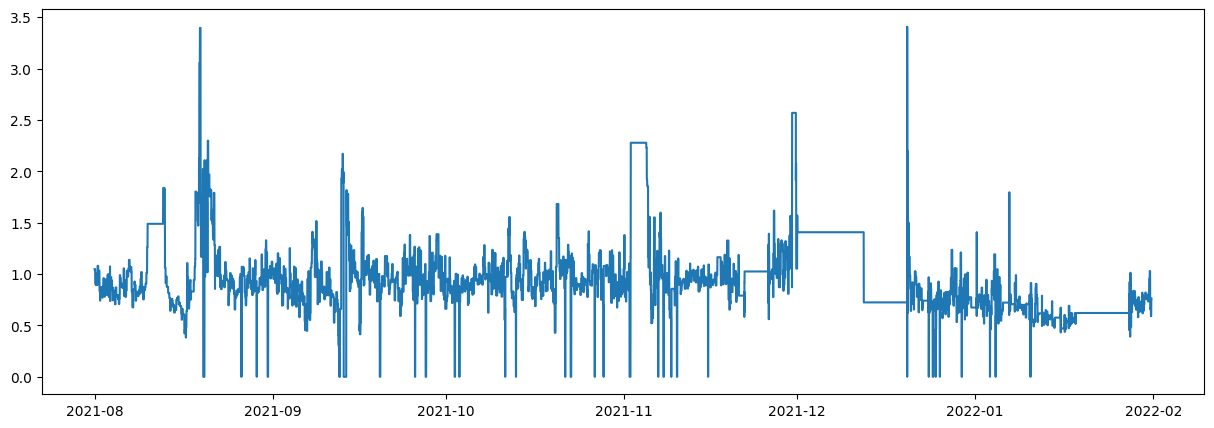

In [35]:

plt.plot(rc22, for_RNN_data_CIVS['Cast_Avg_Si_f2'])


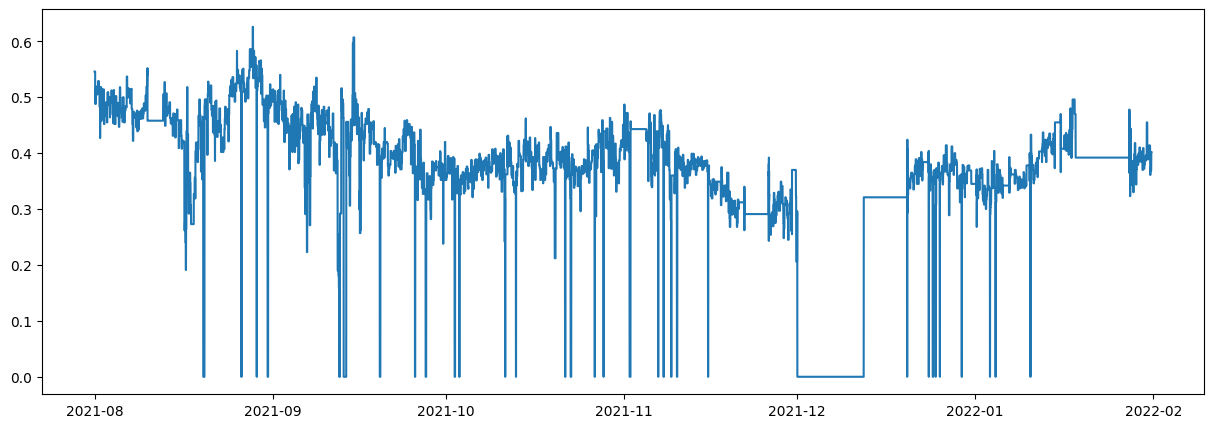

In [36]:

plt.plot(rc22, for_RNN_data_CIVS[ 'Cast_Avg_Mn_f2'])


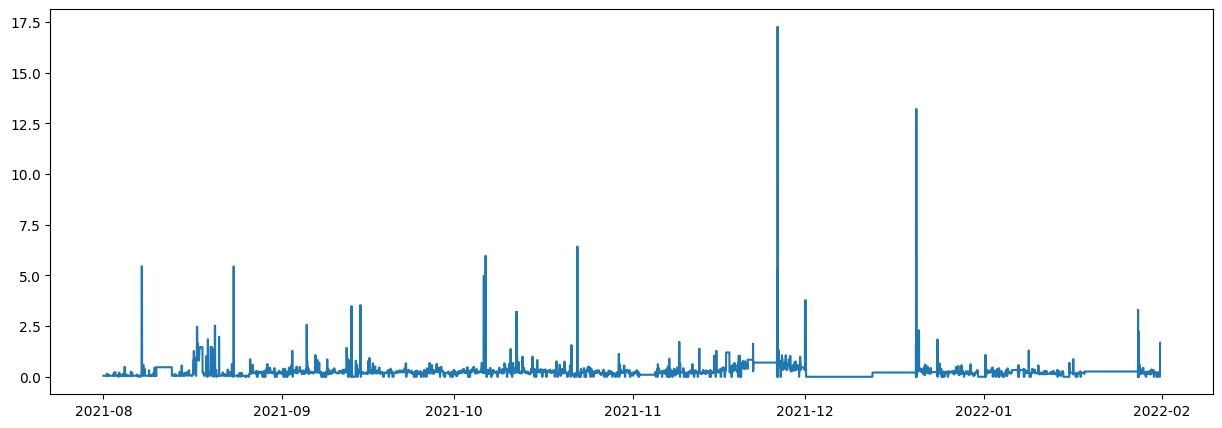

In [37]:

plt.plot(rc22, for_RNN_data_CIVS['Slag_Fe_f2'])



## Back to the Data Processing


In [38]:

l_new2 = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']


In [39]:

## for_RNN_data_CIVS = for_RNN_data_CIVS[ l_new2 ]


In [40]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265736 entries, 0 to 265735
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SI_f1                   265736 non-null  float64       
 1   MM_Timestamp_f1         265736 non-null  datetime64[ns]
 2   HOST_BLAST_MOISTURE_f3  265736 non-null  float64       
 3   NE_Uptake_f3            265736 non-null  float64       
 4   SE_Uptake_f3            265736 non-null  float64       
 5   NW_Uptake_f3            265736 non-null  float64       
 6   SW_Uptake_f3            265736 non-null  float64       
 7   Selec_Top_Gas_CO_f3     265736 non-null  float64       
 8   Selec_Top_Gas_CO2_f3    265736 non-null  float64       
 9   Selec_Top_Gas_H2_f3     265736 non-null  float64       
 10  Selec_Top_Gas_N2_f3     265736 non-null  float64       
 11  HOT_BLAST_TMP_NS_f3     265736 non-null  float64       
 12  WINDRATE_f3             265736

In [41]:

for_RNN_data_CIVS


SI_f1     MM_Timestamp_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  \
0       1.152000 2021-08-01 00:00:00                8.084517    158.478922   
1       1.152000 2021-08-01 00:01:00                8.079545    159.637733   
2       1.152000 2021-08-01 00:02:00                8.074573    160.796544   
3       1.152000 2021-08-01 00:03:00                8.069602    161.955355   
4       1.152000 2021-08-01 00:04:00                8.064630    163.102736   
...          ...                 ...                     ...           ...   
265731  0.662065 2022-01-31 16:12:00                5.155158    168.935281   
265732  0.662446 2022-01-31 16:13:00                5.161362    170.715532   
265733  0.662826 2022-01-31 16:14:00                5.167567    172.495783   
265734  0.663207 2022-01-31 16:15:00                5.173771    174.440392   
265735  0.663587 2022-01-31 16:16:00                5.179976    178.348950   

        SE_Uptake_f3  NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  \
0         245.634175    145.396538    220.717349            22.322068   
1         252.459217    145.570895    226.360600            22.335329   
2         252.645736    145.745252    230.297540            22.348590   
3         247.987563    145.919609    225.220292            22.361852   
4         226.923719    146.093966    218.827693            22.375113   
...              ...           ...           ...                  ...   
265731    202.117809    163.555824    219.714757            20.510372   
265732    202.106673    164.493156    220.911245            20.510606   
265733    205.875063    165.430489    222.902059            20.510840   
265734    212.764586    166.688229    232.269437            20.511074   
265735    219.654109    170.012230    243.436510            20.511309   

        Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                  18.729296             3.559210            54.250139   
1                  18.731320             3.559234            54.194257   
2                  18.733343             3.559259            54.138374   
3                  18.735367             3.559284            54.082797   
4                  18.737391             3.559309            54.063779   
...                      ...                  ...                  ...   
265731             17.817248             4.376637            55.682915   
265732             17.815391             4.376798            55.688159   
265733             17.813534             4.376959            55.693057   
265734             17.811677             4.377119            55.697567   
265735             17.809820             4.377280            55.698785   

        HOT_BLAST_TMP_NS_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0               1999.604384   179.749638               2.510680           0.0   
1               2000.288837   179.765945               2.489381           0.0   
2               1999.242862   179.782251               2.489037           0.0   
3               1999.884442   179.798490               2.496867           0.0   
4               1999.849729   179.784430               2.501961           0.0   
...                     ...          ...                    ...           ...   
265731          2162.689809   188.599806               0.000000           0.0   
265732          2162.438593   188.536026               0.000000           0.0   
265733          2162.032539   189.264351               0.000000           0.0   
265734          2160.858603   189.426471               0.000000           0.0   
265735          2159.580246   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4


## Iterate and mark transitions


In [42]:

for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control1',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control4',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control2',
                                value = 0)


for_RNN_data_CIVS.insert(       loc = 0,
                                column = 'control3',
                                value = 0)



for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              0         0         0         0  1.152000 2021-08-01 00:01:00   
2              0         0         0         0  1.152000 2021-08-01 00:02:00   
3              0         0         0         0  1.152000 2021-08-01 00:03:00   
4              0         0         0         0  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
265731         0         0         0         0  0.662065 2022-01-31 16:12:00   
265732         0         0         0         0  0.662446 2022-01-31 16:13:00   
265733         0         0         0         0  0.662826 2022-01-31 16:14:00   
265734         0         0         0         0  0.663207 2022-01-31 16:15:00   
265735         0         0         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
265731                5.155158    168.935281    202.117809    163.555824  ...   
265732                5.161362    170.715532    202.106673    164.493156  ...   
265733                5.167567    172.495783    205.875063    165.430489  ...   
265734                5.173771    174.440392    212.764586    166.688229  ...   
265735                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
265731            55.682915          2162.689809   188.599806   
265732            55.688159          2162.438593   188.536026   
265733            55.693057          2162.032539   189.264351   
265734            55.697567          2160.858603   189.426471   
265735            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
265731               0.000000           0.0            9680.930154   
265732               0.000000           0.0            9665.389423   
265733               0.000000           0.0            9652.217004   
265734               0.000000           0.0            9661.236786   
265735               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .

In [43]:

indeces_to_2500_control2 = []

indeces_to_2500 = [] 

counter_control2 = 0

counter = 500

prev_val = 0.0
    
for index, row in for_RNN_data_CIVS.iterrows():

    ## print( row["SI_f1"]  )
    #########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control1'] = counter
        counter = counter + 1
        indeces_to_2500.append( index )
    else:
        if counter > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500 ] = 1
            indeces_to_2500 = []
        else:
            indeces_to_2500 = []
        counter = 0

    ##########################################################################
    if row["SI_f1"] != prev_val:
        for_RNN_data_CIVS.at[index, 'control2'] = counter_control2
        counter_control2 = counter_control2 + 1
        indeces_to_2500_control2.append(  index  )
    else:
        if counter_control2 > 2000:
            ## print(counter)
            ## input()
            for_RNN_data_CIVS["control4"][indeces_to_2500_control2 ] = 1
            indeces_to_2500_control2 = []
        else:
            indeces_to_2500_control2 = []
        counter_control2 = 0

    ##########################################################################
    if row["SI_f1"] == prev_val:
        for_RNN_data_CIVS.at[index, 'control3'] = 1.0

    ##########################################################################
    if index  % 50000 == 0:
        print(index )
    prev_val = row["SI_f1"]
        
    

    


0
50000
100000
150000
200000
250000


array([<Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>, <Axes: xlabel='MM_Timestamp_f1'>,
       <Axes: xlabel='MM_Timestamp_f1'>], dtype=object)

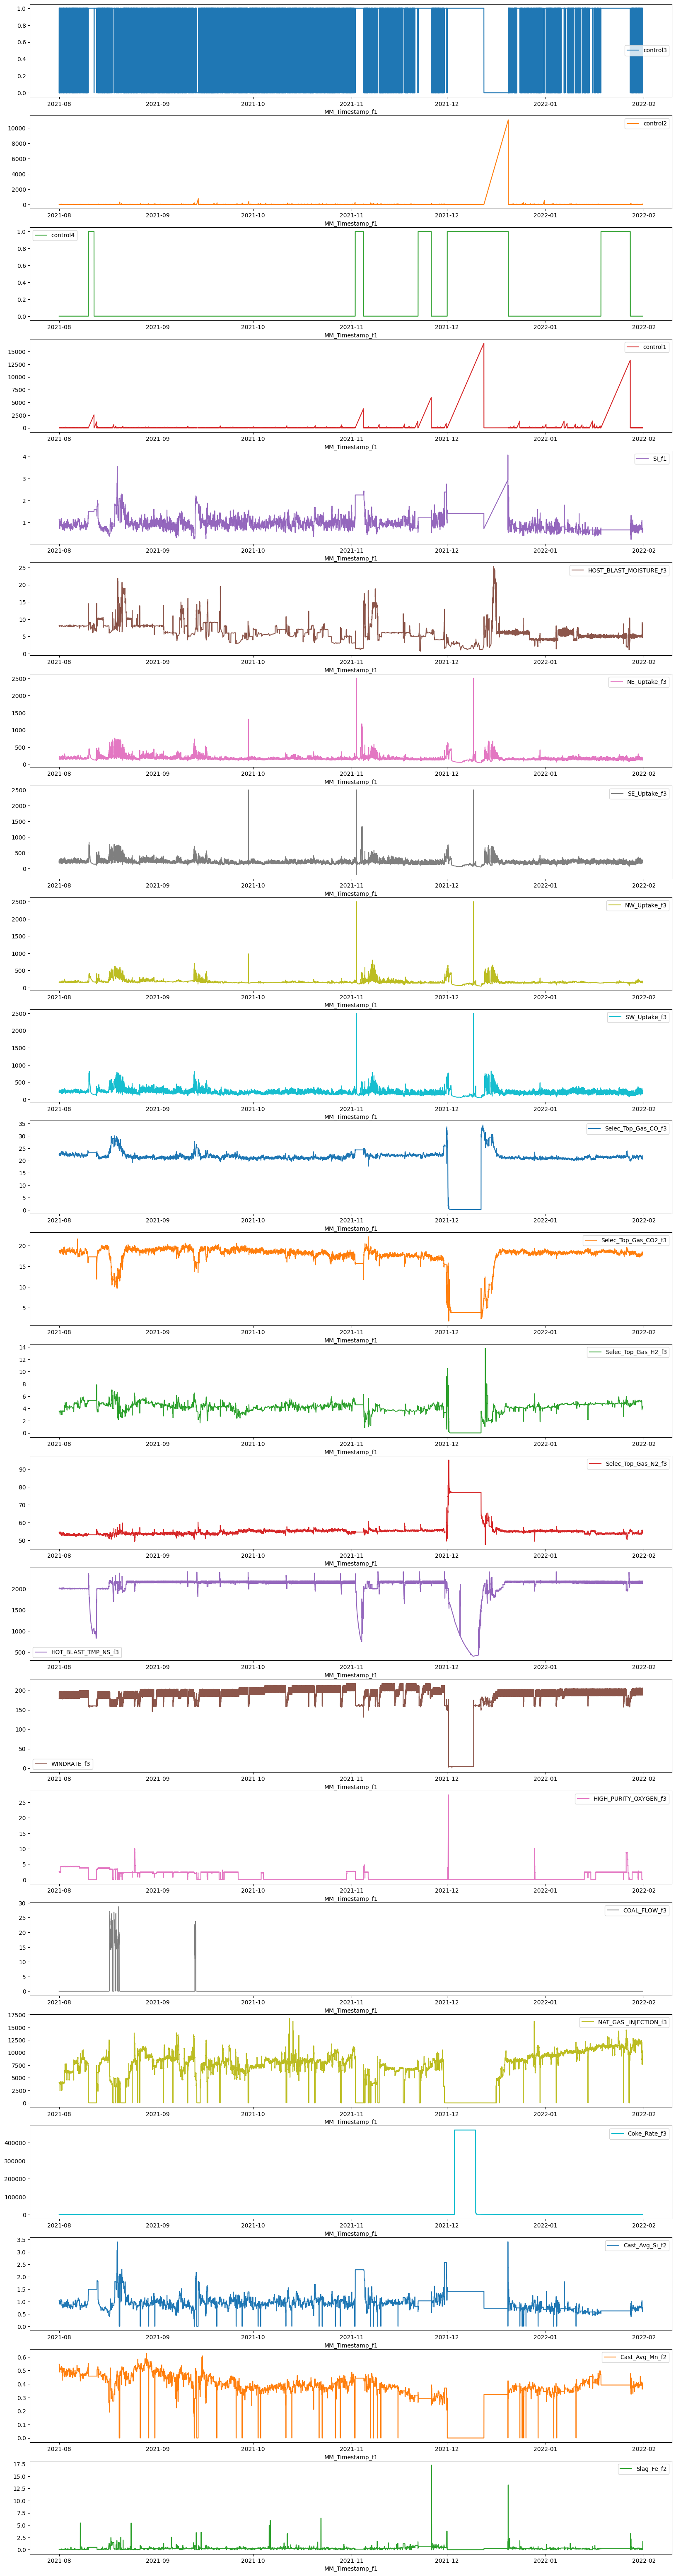

In [44]:

## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )


for_RNN_data_CIVS.plot(x='MM_Timestamp_f1' , kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )


In [45]:

for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              1         0         0         0  1.152000 2021-08-01 00:01:00   
2              1         0         0         1  1.152000 2021-08-01 00:02:00   
3              1         0         0         2  1.152000 2021-08-01 00:03:00   
4              1         0         0         3  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
265731         0        57         0         0  0.662065 2022-01-31 16:12:00   
265732         0        58         0         0  0.662446 2022-01-31 16:13:00   
265733         0        59         0         0  0.662826 2022-01-31 16:14:00   
265734         0        60         0         0  0.663207 2022-01-31 16:15:00   
265735         0        61         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
265731                5.155158    168.935281    202.117809    163.555824  ...   
265732                5.161362    170.715532    202.106673    164.493156  ...   
265733                5.167567    172.495783    205.875063    165.430489  ...   
265734                5.173771    174.440392    212.764586    166.688229  ...   
265735                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
265731            55.682915          2162.689809   188.599806   
265732            55.688159          2162.438593   188.536026   
265733            55.693057          2162.032539   189.264351   
265734            55.697567          2160.858603   189.426471   
265735            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
265731               0.000000           0.0            9680.930154   
265732               0.000000           0.0            9665.389423   
265733               0.000000           0.0            9652.217004   
265734               0.000000           0.0            9661.236786   
265735               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .


## Drop row with value above x


In [46]:

## for_RNN_data_CIVS = for_RNN_data_CIVS.drop( for_RNN_data_CIVS[ for_RNN_data_CIVS.control4 == 1 ].index ) ## , inplace = True)

for_RNN_data_CIVS = for_RNN_data_CIVS [ for_RNN_data_CIVS ["control4"] == 0].reset_index( drop=True )  ## this one


In [47]:

for_RNN_data_CIVS


control3  control2  control4  control1     SI_f1     MM_Timestamp_f1  \
0              0         0         0         0  1.152000 2021-08-01 00:00:00   
1              1         0         0         0  1.152000 2021-08-01 00:01:00   
2              1         0         0         1  1.152000 2021-08-01 00:02:00   
3              1         0         0         2  1.152000 2021-08-01 00:03:00   
4              1         0         0         3  1.152000 2021-08-01 00:04:00   
...          ...       ...       ...       ...       ...                 ...   
212427         0        57         0         0  0.662065 2022-01-31 16:12:00   
212428         0        58         0         0  0.662446 2022-01-31 16:13:00   
212429         0        59         0         0  0.662826 2022-01-31 16:14:00   
212430         0        60         0         0  0.663207 2022-01-31 16:15:00   
212431         0        61         0         0  0.663587 2022-01-31 16:16:00   

        HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  ...  \
0                     8.084517    158.478922    245.634175    145.396538  ...   
1                     8.079545    159.637733    252.459217    145.570895  ...   
2                     8.074573    160.796544    252.645736    145.745252  ...   
3                     8.069602    161.955355    247.987563    145.919609  ...   
4                     8.064630    163.102736    226.923719    146.093966  ...   
...                        ...           ...           ...           ...  ...   
212427                5.155158    168.935281    202.117809    163.555824  ...   
212428                5.161362    170.715532    202.106673    164.493156  ...   
212429                5.167567    172.495783    205.875063    165.430489  ...   
212430                5.173771    174.440392    212.764586    166.688229  ...   
212431                5.179976    178.348950    219.654109    170.012230  ...   

        Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                 54.250139          1999.604384   179.749638   
1                 54.194257          2000.288837   179.765945   
2                 54.138374          1999.242862   179.782251   
3                 54.082797          1999.884442   179.798490   
4                 54.063779          1999.849729   179.784430   
...                     ...                  ...          ...   
212427            55.682915          2162.689809   188.599806   
212428            55.688159          2162.438593   188.536026   
212429            55.693057          2162.032539   189.264351   
212430            55.697567          2160.858603   189.426471   
212431            55.698785          2159.580246   189.163382   

        HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0                    2.510680           0.0            4034.234339   
1                    2.489381           0.0            4024.947376   
2                    2.489037           0.0            4011.601682   
3                    2.496867           0.0            4012.024633   
4                    2.501961           0.0            4000.467204   
...                       ...           ...                    ...   
212427               0.000000           0.0            9680.930154   
212428               0.000000           0.0            9665.389423   
212429               0.000000           0.0            9652.217004   
212430               0.000000           0.0            9661.236786   
212431               0.000000           0.0            9678.098686   

        Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0                992           1.048           0.546        0.05  
1                992           1.048           0.546        0.05  
2                992           1.048           0.546        0.05  
3                992           1.048           0.546        0.05  
4                992           1.048           0.546        0.05  
...              ...             ...             .

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

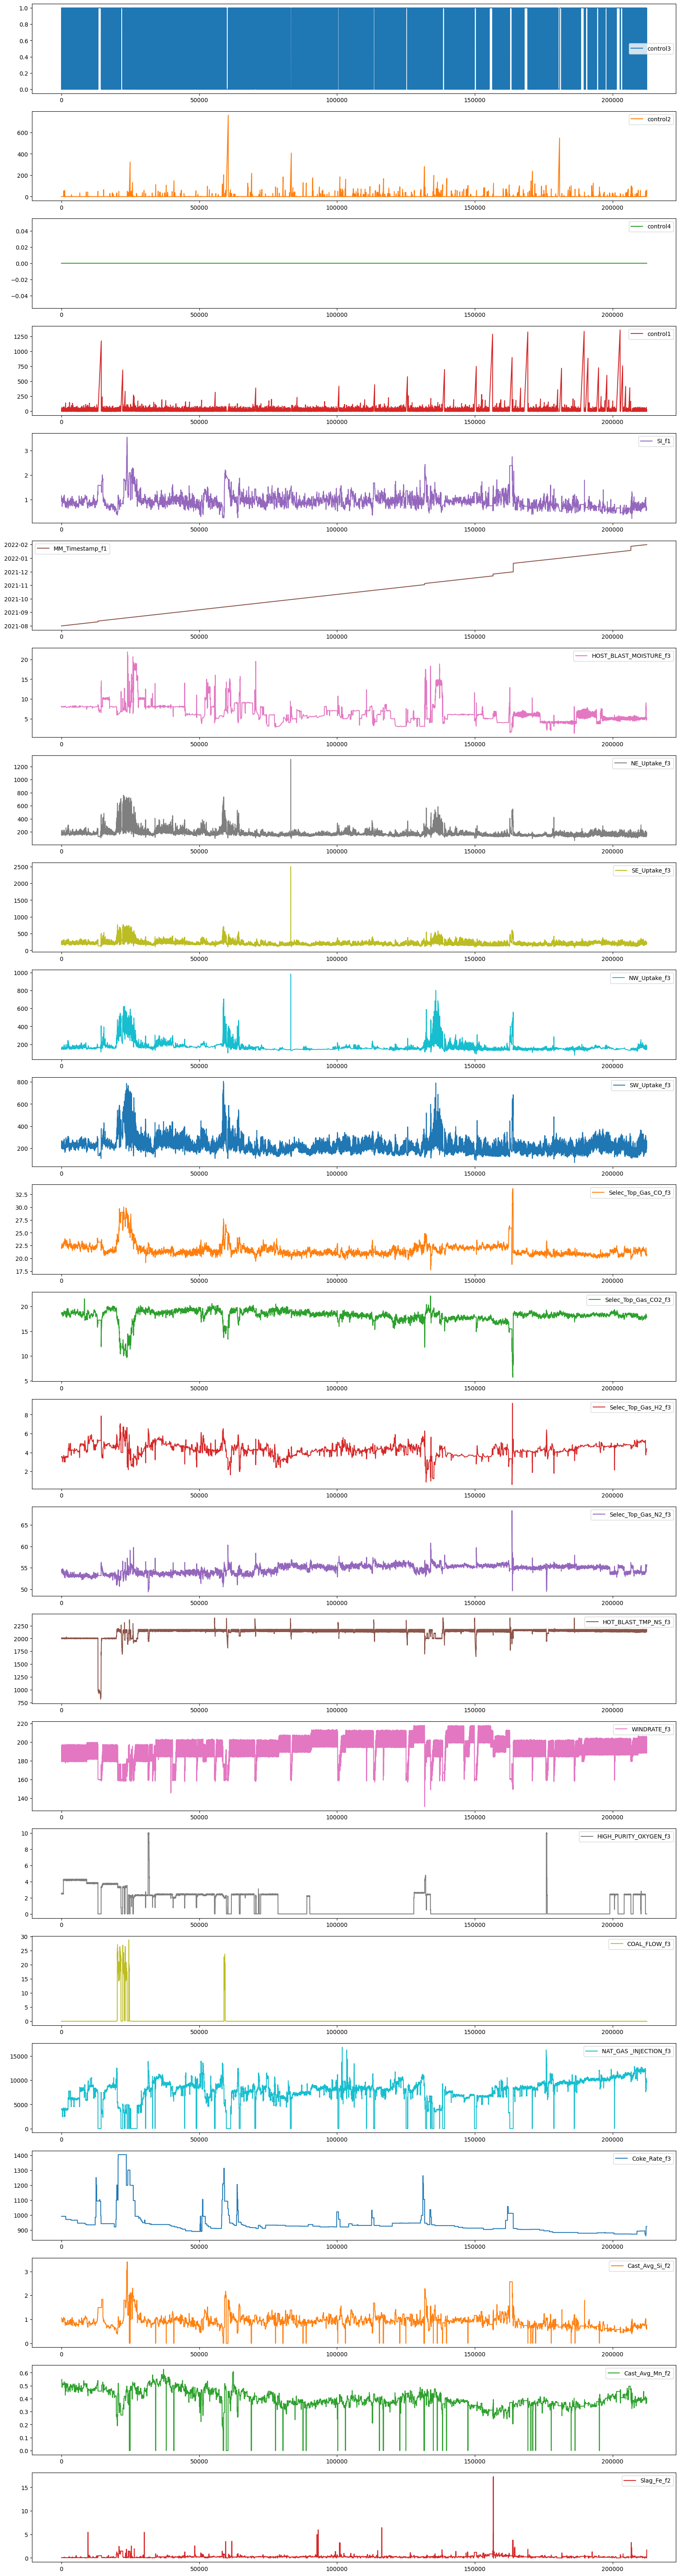

In [48]:

## for_RNN_data_CIVS.plot(  figsize=(20,80),  subplots=True   )

for_RNN_data_CIVS.plot( kind='line', subplots=True, figsize=(20,80),
        sharex=False, sharey=False, legend=True )



## Remove date time columns 


In [49]:

l_new2 = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']


In [50]:

for_RNN_data_CIVS = for_RNN_data_CIVS[ l_new2 ]


In [51]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212432 entries, 0 to 212431
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SI_f1                   212432 non-null  float64
 1   HOST_BLAST_MOISTURE_f3  212432 non-null  float64
 2   NE_Uptake_f3            212432 non-null  float64
 3   SE_Uptake_f3            212432 non-null  float64
 4   NW_Uptake_f3            212432 non-null  float64
 5   SW_Uptake_f3            212432 non-null  float64
 6   Selec_Top_Gas_CO_f3     212432 non-null  float64
 7   Selec_Top_Gas_CO2_f3    212432 non-null  float64
 8   Selec_Top_Gas_H2_f3     212432 non-null  float64
 9   Selec_Top_Gas_N2_f3     212432 non-null  float64
 10  HOT_BLAST_TMP_NS_f3     212432 non-null  float64
 11  WINDRATE_f3             212432 non-null  float64
 12  HIGH_PURITY_OXYGEN_f3   212432 non-null  float64
 13  COAL_FLOW_f3            212432 non-null  float64
 14  NAT_GAS _INJECTION_f

In [52]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  \
0       1.152000                8.084517    158.478922    245.634175   
1       1.152000                8.079545    159.637733    252.459217   
2       1.152000                8.074573    160.796544    252.645736   
3       1.152000                8.069602    161.955355    247.987563   
4       1.152000                8.064630    163.102736    226.923719   
...          ...                     ...           ...           ...   
212427  0.662065                5.155158    168.935281    202.117809   
212428  0.662446                5.161362    170.715532    202.106673   
212429  0.662826                5.167567    172.495783    205.875063   
212430  0.663207                5.173771    174.440392    212.764586   
212431  0.663587                5.179976    178.348950    219.654109   

        NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0         145.396538    220.717349            22.322068             18.729296   
1         145.570895    226.360600            22.335329             18.731320   
2         145.745252    230.297540            22.348590             18.733343   
3         145.919609    225.220292            22.361852             18.735367   
4         146.093966    218.827693            22.375113             18.737391   
...              ...           ...                  ...                   ...   
212427    163.555824    219.714757            20.510372             17.817248   
212428    164.493156    220.911245            20.510606             17.815391   
212429    165.430489    222.902059            20.510840             17.813534   
212430    166.688229    232.269437            20.511074             17.811677   
212431    170.012230    243.436510            20.511309             17.809820   

        Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  \
0                  3.559210            54.250139          1999.604384   
1                  3.559234            54.194257          2000.288837   
2                  3.559259            54.138374          1999.242862   
3                  3.559284            54.082797          1999.884442   
4                  3.559309            54.063779          1999.849729   
...                     ...                  ...                  ...   
212427             4.376637            55.682915          2162.689809   
212428             4.376798            55.688159          2162.438593   
212429             4.376959            55.693057          2162.032539   
212430             4.377119            55.697567          2160.858603   
212431             4.377280            55.698785          2159.580246   

        WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0        179.749638               2.510680           0.0   
1        179.765945               2.489381           0.0   
2        179.782251               2.489037           0.0   
3        179.798490               2.496867           0.0   
4        179.784430               2.501961           0.0   
...             ...                    ...           ...   
212427   188.599806               0.000000           0.0   
212428   188.536026               0.000000           0.0   
212429   189.264351               0.000000           0.0   
212430   189.426471               0.000000           0.0   
212431   189.163382               0.000000           0.0   

        NAT_GAS _INJECTION_f3  Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  \
0                 4034.234339           992           1.048           0.546   
1                 4024.947376           992           1.048           0.546   
2                 4011.601682           992           1.048           0.546   
3                 4012.024633           992           1.048           0.546   
4                 4000.467204           992           1.048           0.546   
...                       ...           ...             ...             ...   
212427            9680


## Average the rows to control time step


In [53]:

window                 = 10    ## 90   ## 30          ## seq length

silicon_feature_index  = 0

avg_the_rows_parameter =   60  ## 15




## 1    ->  1 minute time step
## 15   -> 15 minute time step
## 1440 -> 24 hour time step
## 480  -> 8 hour shift
## 60   -> 1 hour time step



## Sanity check


In [54]:



data = [
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30],
[18 , 22,  39 , 29],
[20 , 9,   15,  47],
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30],
[18 , 22,  39 , 29],
[20 , 9,   15,  47],
[2,   50,  25,  26],
[4,   11,  38,  44],
[6,   33,  16,  25],
[8 ,  37,  27,  25],
[10,  28,  48,  32],
[12,  47,  35,  45],
[14,  8,   16,  7],
[16,  12,  16,  30]
]



df_example = pd.DataFrame( data, columns=['a', 'b', 'c', 'd'] )
 

print(df_example)


     a   b   c   d
0   20   9  15  47
1    2  50  25  26
2    4  11  38  44
3    6  33  16  25
4    8  37  27  25
5   10  28  48  32
6   12  47  35  45
7   14   8  16   7
8   16  12  16  30
9   18  22  39  29
10  20   9  15  47
11  20   9  15  47
12   2  50  25  26
13   4  11  38  44
14   6  33  16  25
15   8  37  27  25
16  10  28  48  32
17  12  47  35  45
18  14   8  16   7
19  16  12  16  30
20  18  22  39  29
21  20   9  15  47
22   2  50  25  26
23   4  11  38  44
24   6  33  16  25
25   8  37  27  25
26  10  28  48  32
27  12  47  35  45
28  14   8  16   7
29  16  12  16  30


In [55]:

print(df_example.shape)


(30, 4)


In [56]:

avg_df_example = df_example.groupby(np.arange(len(df_example))//avg_the_rows_parameter).mean()
avg_df_example.shape


(1, 4)

In [57]:

avg_df_example


a          b     c     d
0  11.066667  25.266667  26.7  31.6


## Now Avg to change time step


In [58]:

## for_RNN_data_CIVS

print(for_RNN_data_CIVS.shape)


(212432, 19)


In [59]:

for_RNN_data_CIVS = for_RNN_data_CIVS.groupby(np.arange(len(for_RNN_data_CIVS))//avg_the_rows_parameter).mean()
for_RNN_data_CIVS.shape


(3541, 19)

In [60]:

for_RNN_data_CIVS


SI_f1  HOST_BLAST_MOISTURE_f3  NE_Uptake_f3  SE_Uptake_f3  \
0     1.020000                8.071502    166.937850    211.793582   
1     1.048417                8.057541    184.264928    225.538310   
2     0.991900                7.954700    178.926620    225.086533   
3     0.935100                8.004213    173.917513    216.674735   
4     0.746400                8.071071    172.443547    208.914264   
...        ...                     ...           ...           ...   
3536  0.660167                7.840869    153.914623    200.889933   
3537  0.638350                5.856727    163.250237    217.053805   
3538  0.570267                4.788482    162.961450    207.343788   
3539  0.624198                4.931742    166.878154    214.491317   
3540  0.657690                5.089526    167.558322    214.001872   

      NW_Uptake_f3  SW_Uptake_f3  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
0       151.393990    217.542358            22.220654             18.669278   
1       156.996338    240.607199            22.035364             18.555756   
2       157.278643    235.700654            22.141132             18.717211   
3       154.870440    222.826409            22.530854             18.587600   
4       155.772995    229.553937            22.586574             18.550536   
...            ...           ...                  ...                   ...   
3536    156.562940    197.828085            21.639176             18.299409   
3537    165.817852    215.726321            21.038543             18.053194   
3538    162.612025    213.825621            20.695757             18.053267   
3539    163.900145    229.712155            20.823350             17.951972   
3540    164.730278    228.903396            20.561431             17.837106   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  HOT_BLAST_TMP_NS_f3  \
0                3.559941            54.201909          2000.558043   
1                3.562588            54.436241          1999.223011   
2                3.515750            54.269631          1999.979910   
3                3.507243            53.985095          2000.073656   
4                3.515769            53.884126          1998.895428   
...                   ...                  ...                  ...   
3536             4.231142            54.294850          2160.464013   
3537             4.206782            55.060428          2167.823320   
3538             4.351761            55.384318          2157.465955   
3539             4.367401            55.409358          2169.410396   
3540             4.374790            55.639096          2161.767143   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  NAT_GAS _INJECTION_f3  \
0      180.406397               2.497526           0.0            4016.305998   
1      180.588483               2.500253           0.0            4010.258776   
2      180.323798               2.501256           0.0            3939.393240   
3      180.188239               2.499866           0.0            3955.840844   
4      180.242962               2.499496           0.0            4013.892446   
...           ...                    ...           ...                    ...   
3536   189.839065               0.000000           0.0            8236.309373   
3537   190.151824               0.000000           0.0            9283.006145   
3538   189.784138               0.000000           0.0            9884.049659   
3539   189.830262               0.000000           0.0            9654.035539   
3540   190.123609               0.000000           0.0            9704.858509   

      Coke_Rate_f3  Cast_Avg_Si_f2  Cast_Avg_Mn_f2  Slag_Fe_f2  
0           992.00        1.048000        0.546000    0.050000  
1           992.00        1.048000        0.546000    0.050000  
2           992.00        0.967533        0.513133    0.050000  
3           992.00        0.906000        0.488000    0.050000  
4           992.00        0.906000        0.488000    0.050000  
...


## Create datasets of selected features


In [61]:

pd.options.display.max_columns = None


In [62]:

def window_seq_conversion_multi_feature(df, window, target_index):
    d = df.values
    ## print( d )
    print( d.shape )
    x = []
    n = len(df)
    n_features = df.shape[1]
    ## print(n_features)
    ## print(n)

    idx = df.index[ : -window]
    print(idx)
    print(  idx.shape  )


    for start in range(n-window):
        end = start + window
        ## print(start, "....", end)
        x.append( d[ start:end, : ] )

    ## print(x)
    cols_x = [ f'xt_{i}_fx_{j}' for i in range(1, window+1) for j in range(0, n_features)]
    cols_y = [ f'y_fy_{j}' for j in range(0, n_features)]
    ## print(  cols  )

    x = np.array(x)
    print(x.shape)
    x = np.array(x).reshape(n-window, -1)
    print(x.shape)

    y = df.iloc[ window: , : ].values
    print( y.shape )
    ## print( y.reshape(-1).shape )

    df_xs = pd.DataFrame(x  , columns=cols_x,  index=idx)
    df_y  = pd.DataFrame(y  , columns=cols_y,  index=idx)
    ## print(df_y)
    return pd.concat( [df_xs, df_y], axis=1 )



## Make Data Sequential


In [63]:

 
res_multi_feature_df = window_seq_conversion_multi_feature( for_RNN_data_CIVS, window,  silicon_feature_index )


(3541, 19)
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530],
      dtype='int64', length=3531)
(3531,)
(3531, 10, 19)
(3531, 190)
(3531, 19)


In [64]:

res_multi_feature_df


xt_1_fx_0  xt_1_fx_1   xt_1_fx_2   xt_1_fx_3   xt_1_fx_4   xt_1_fx_5  \
0      1.020000   8.071502  166.937850  211.793582  151.393990  217.542358   
1      1.048417   8.057541  184.264928  225.538310  156.996338  240.607199   
2      0.991900   7.954700  178.926620  225.086533  157.278643  235.700654   
3      0.935100   8.004213  173.917513  216.674735  154.870440  222.826409   
4      0.746400   8.071071  172.443547  208.914264  155.772995  229.553937   
...         ...        ...         ...         ...         ...         ...   
3526   0.750933   5.017550  155.021995  191.506102  163.476941  205.653901   
3527   0.711483   5.021917  156.480996  194.682208  165.753733  204.509483   
3528   0.721350   5.037974  154.560260  190.783558  163.710914  197.811225   
3529   0.927850   5.092719  159.799543  192.316749  161.025145  205.262332   
3530   0.846300   5.022638  168.305902  203.539544  162.064582  219.341593   

      xt_1_fx_6  xt_1_fx_7  xt_1_fx_8  xt_1_fx_9   xt_1_fx_10  xt_1_fx_11  \
0     22.220654  18.669278   3.559941  54.201909  2000.558043  180.406397   
1     22.035364  18.555756   3.562588  54.436241  1999.223011  180.588483   
2     22.141132  18.717211   3.515750  54.269631  1999.979910  180.323798   
3     22.530854  18.587600   3.507243  53.985095  2000.073656  180.188239   
4     22.586574  18.550536   3.515769  53.884126  1998.895428  180.242962   
...         ...        ...        ...        ...          ...         ...   
3526  21.687797  17.768533   5.094553  53.744641  2167.940990  190.136598   
3527  21.506954  17.886045   5.055075  53.752536  2154.578198  190.187547   
3528  21.378384  17.928088   5.061520  53.791559  2169.926218  189.694894   
3529  21.382082  18.174518   5.086598  53.552869  2153.988487  190.230617   
3530  21.271236  17.995774   5.122825  53.793535  2168.503336  189.569674   

      xt_1_fx_12  xt_1_fx_13    xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  \
0       2.497526         0.0   4016.305998      992.00    1.048000   
1       2.500253         0.0   4010.258776      992.00    1.048000   
2       2.501256         0.0   3939.393240      992.00    0.967533   
3       2.499866         0.0   3955.840844      992.00    0.906000   
4       2.499496         0.0   4013.892446      992.00    0.906000   
...          ...         ...           ...         ...         ...   
3526    2.396785         0.0  11781.637818      894.00    0.741000   
3527    2.398503         0.0  11814.379916      894.00    0.735267   
3528    2.401780         0.0  12035.671946      894.00    0.745750   
3529    2.400994         0.0  12047.368934      878.25    0.818000   
3530    2.400270         0.0  12169.090758      873.00    0.835600   

      xt_1_fx_17  xt_1_fx_18  xt_2_fx_0  xt_2_fx_1   xt_2_fx_2   xt_2_fx_3  \
0       0.546000    0.050000   1.048417   8.057541  184.264928  225.538310   
1       0.546000    0.050000   0.991900   7.954700  178.926620  225.086533   
2       0.513133    0.050000   0.935100   8.004213  173.917513  216.674735   
3       0.488000    0.050000   0.746400   8.071071  172.443547  208.914264   
4       0.488000    0.050000   0.867000   8.061964  182.578141  214.740582   
...          ...         ...        ...        ...         ...         ...   
3526    0.400000    0.000000   0.711483   5.021917  156.480996  194.682208   
3527    0.392117    0.157667   0.721350   5.037974  154.560260  190.783558   
3528    0.391250    0.187000   0.927850   5.092719  159.799543  192.316749   
3529    0.404000    0.000000   0.846300   5.022638  168.305902  203.539544   
3530    0.405333    0.024000   0.958167   5.137380  168.984855  204.926824   

       xt_2_fx_4   xt_2_fx_5  xt_2_fx_6  xt_2_fx_7  xt_2_fx_8  xt_2_fx_9  \
0     156.996338  240.607199  22.035364  18.555756   3.562588  54.436241   
1     157.278643  235.700654  22.141132  18.717211   3.515750  54.269631   
2     154.870440  222.826409  22.530854  18.587600   3.507243  53.985095   
3     155.772995  229.553937  22.586574  18.550536   3.515769 

In [65]:

print( res_multi_feature_df.shape )


(3531, 209)



## Drop desired columns from Sequential Data Frame (such as silicon from X)


In [66]:

df = res_multi_feature_df

df.drop(  list(   df.filter(regex='_fx_0')   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )


(3531, 199)


In [67]:

print( res_multi_feature_df.shape )


(3531, 199)


In [68]:

res_multi_feature_df


xt_1_fx_1   xt_1_fx_2   xt_1_fx_3   xt_1_fx_4   xt_1_fx_5  xt_1_fx_6  \
0      8.071502  166.937850  211.793582  151.393990  217.542358  22.220654   
1      8.057541  184.264928  225.538310  156.996338  240.607199  22.035364   
2      7.954700  178.926620  225.086533  157.278643  235.700654  22.141132   
3      8.004213  173.917513  216.674735  154.870440  222.826409  22.530854   
4      8.071071  172.443547  208.914264  155.772995  229.553937  22.586574   
...         ...         ...         ...         ...         ...        ...   
3526   5.017550  155.021995  191.506102  163.476941  205.653901  21.687797   
3527   5.021917  156.480996  194.682208  165.753733  204.509483  21.506954   
3528   5.037974  154.560260  190.783558  163.710914  197.811225  21.378384   
3529   5.092719  159.799543  192.316749  161.025145  205.262332  21.382082   
3530   5.022638  168.305902  203.539544  162.064582  219.341593  21.271236   

      xt_1_fx_7  xt_1_fx_8  xt_1_fx_9   xt_1_fx_10  xt_1_fx_11  xt_1_fx_12  \
0     18.669278   3.559941  54.201909  2000.558043  180.406397    2.497526   
1     18.555756   3.562588  54.436241  1999.223011  180.588483    2.500253   
2     18.717211   3.515750  54.269631  1999.979910  180.323798    2.501256   
3     18.587600   3.507243  53.985095  2000.073656  180.188239    2.499866   
4     18.550536   3.515769  53.884126  1998.895428  180.242962    2.499496   
...         ...        ...        ...          ...         ...         ...   
3526  17.768533   5.094553  53.744641  2167.940990  190.136598    2.396785   
3527  17.886045   5.055075  53.752536  2154.578198  190.187547    2.398503   
3528  17.928088   5.061520  53.791559  2169.926218  189.694894    2.401780   
3529  18.174518   5.086598  53.552869  2153.988487  190.230617    2.400994   
3530  17.995774   5.122825  53.793535  2168.503336  189.569674    2.400270   

      xt_1_fx_13    xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  xt_1_fx_17  \
0            0.0   4016.305998      992.00    1.048000    0.546000   
1            0.0   4010.258776      992.00    1.048000    0.546000   
2            0.0   3939.393240      992.00    0.967533    0.513133   
3            0.0   3955.840844      992.00    0.906000    0.488000   
4            0.0   4013.892446      992.00    0.906000    0.488000   
...          ...           ...         ...         ...         ...   
3526         0.0  11781.637818      894.00    0.741000    0.400000   
3527         0.0  11814.379916      894.00    0.735267    0.392117   
3528         0.0  12035.671946      894.00    0.745750    0.391250   
3529         0.0  12047.368934      878.25    0.818000    0.404000   
3530         0.0  12169.090758      873.00    0.835600    0.405333   

      xt_1_fx_18  xt_2_fx_1   xt_2_fx_2   xt_2_fx_3   xt_2_fx_4   xt_2_fx_5  \
0       0.050000   8.057541  184.264928  225.538310  156.996338  240.607199   
1       0.050000   7.954700  178.926620  225.086533  157.278643  235.700654   
2       0.050000   8.004213  173.917513  216.674735  154.870440  222.826409   
3       0.050000   8.071071  172.443547  208.914264  155.772995  229.553937   
4       0.050000   8.061964  182.578141  214.740582  160.003601  231.216853   
...          ...        ...         ...         ...         ...         ...   
3526    0.000000   5.021917  156.480996  194.682208  165.753733  204.509483   
3527    0.157667   5.037974  154.560260  190.783558  163.710914  197.811225   
3528    0.187000   5.092719  159.799543  192.316749  161.025145  205.262332   
3529    0.000000   5.022638  168.305902  203.539544  162.064582  219.341593   
3530    0.024000   5.137380  168.984855  204.926824  159.735944  214.234843   

      xt_2_fx_6  xt_2_fx_7  xt_2_fx_8  xt_2_fx_9   xt_2_fx_10  xt_2_fx_11  \
0     22.035364  18.555756   3.562588  54.436241  1999.223011  180.588483   
1     22.141132  18.717211   3.515750  54.269631  1999.979910  180.323798   
2     22.530854  18.587600   3.507243  53.985095  2000.073656  180.188239   
3     22.586574  18.550536   3.515


## Drop last in X input sequence

* predict the one not seen , i think




In [69]:

window_str = str(window)
window_str


'10'

In [70]:

string_match_last_seq = "xt_" + window_str
string_match_last_seq 


'xt_10'

In [71]:

df = res_multi_feature_df

df.drop(  list(   df.filter(regex=string_match_last_seq)   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )


(3531, 181)


In [72]:

print( res_multi_feature_df.shape )


(3531, 181)


In [73]:

res_multi_feature_df


xt_1_fx_1   xt_1_fx_2   xt_1_fx_3   xt_1_fx_4   xt_1_fx_5  xt_1_fx_6  \
0      8.071502  166.937850  211.793582  151.393990  217.542358  22.220654   
1      8.057541  184.264928  225.538310  156.996338  240.607199  22.035364   
2      7.954700  178.926620  225.086533  157.278643  235.700654  22.141132   
3      8.004213  173.917513  216.674735  154.870440  222.826409  22.530854   
4      8.071071  172.443547  208.914264  155.772995  229.553937  22.586574   
...         ...         ...         ...         ...         ...        ...   
3526   5.017550  155.021995  191.506102  163.476941  205.653901  21.687797   
3527   5.021917  156.480996  194.682208  165.753733  204.509483  21.506954   
3528   5.037974  154.560260  190.783558  163.710914  197.811225  21.378384   
3529   5.092719  159.799543  192.316749  161.025145  205.262332  21.382082   
3530   5.022638  168.305902  203.539544  162.064582  219.341593  21.271236   

      xt_1_fx_7  xt_1_fx_8  xt_1_fx_9   xt_1_fx_10  xt_1_fx_11  xt_1_fx_12  \
0     18.669278   3.559941  54.201909  2000.558043  180.406397    2.497526   
1     18.555756   3.562588  54.436241  1999.223011  180.588483    2.500253   
2     18.717211   3.515750  54.269631  1999.979910  180.323798    2.501256   
3     18.587600   3.507243  53.985095  2000.073656  180.188239    2.499866   
4     18.550536   3.515769  53.884126  1998.895428  180.242962    2.499496   
...         ...        ...        ...          ...         ...         ...   
3526  17.768533   5.094553  53.744641  2167.940990  190.136598    2.396785   
3527  17.886045   5.055075  53.752536  2154.578198  190.187547    2.398503   
3528  17.928088   5.061520  53.791559  2169.926218  189.694894    2.401780   
3529  18.174518   5.086598  53.552869  2153.988487  190.230617    2.400994   
3530  17.995774   5.122825  53.793535  2168.503336  189.569674    2.400270   

      xt_1_fx_13    xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  xt_1_fx_17  \
0            0.0   4016.305998      992.00    1.048000    0.546000   
1            0.0   4010.258776      992.00    1.048000    0.546000   
2            0.0   3939.393240      992.00    0.967533    0.513133   
3            0.0   3955.840844      992.00    0.906000    0.488000   
4            0.0   4013.892446      992.00    0.906000    0.488000   
...          ...           ...         ...         ...         ...   
3526         0.0  11781.637818      894.00    0.741000    0.400000   
3527         0.0  11814.379916      894.00    0.735267    0.392117   
3528         0.0  12035.671946      894.00    0.745750    0.391250   
3529         0.0  12047.368934      878.25    0.818000    0.404000   
3530         0.0  12169.090758      873.00    0.835600    0.405333   

      xt_1_fx_18  xt_2_fx_1   xt_2_fx_2   xt_2_fx_3   xt_2_fx_4   xt_2_fx_5  \
0       0.050000   8.057541  184.264928  225.538310  156.996338  240.607199   
1       0.050000   7.954700  178.926620  225.086533  157.278643  235.700654   
2       0.050000   8.004213  173.917513  216.674735  154.870440  222.826409   
3       0.050000   8.071071  172.443547  208.914264  155.772995  229.553937   
4       0.050000   8.061964  182.578141  214.740582  160.003601  231.216853   
...          ...        ...         ...         ...         ...         ...   
3526    0.000000   5.021917  156.480996  194.682208  165.753733  204.509483   
3527    0.157667   5.037974  154.560260  190.783558  163.710914  197.811225   
3528    0.187000   5.092719  159.799543  192.316749  161.025145  205.262332   
3529    0.000000   5.022638  168.305902  203.539544  162.064582  219.341593   
3530    0.024000   5.137380  168.984855  204.926824  159.735944  214.234843   

      xt_2_fx_6  xt_2_fx_7  xt_2_fx_8  xt_2_fx_9   xt_2_fx_10  xt_2_fx_11  \
0     22.035364  18.555756   3.562588  54.436241  1999.223011  180.588483   
1     22.141132  18.717211   3.515750  54.269631  1999.979910  180.323798   
2     22.530854  18.587600   3.507243  53.985095  2000.073656  180.188239   
3     22.586574  18.550536   3.515


## Need to adjust windows based on previous step


In [74]:


window = window - 1
window


9


## Utility Functions


In [75]:

class Standardize:
    
    def __init__(self, df, split=0.10):
        self.data  = df
        self.split = split
    
    def split_data(self):
        n           = int( len( self.data ) * self.split )
        train       = self.data.iloc[   :-n ] 
        test        = self.data.iloc[ -n:   ]
        n           = int( len(   train   ) * self.split )
        train       = train.iloc[   :-n ] 
        val         = train.iloc[ -n:   ]
        assert len(test) + len(train) + len(val) == len(self.data)
        return train, test, val
    
    def _transform(self, data):
        data_s = ( data - self.mu ) / self.sigma          
        return data_s
    
    def fit_transform(self):
        train, test, val    = self.split_data()
        self.mu             = train.mean() 
        self.sigma          = train.std()
        train_s             = self._transform( train )
        test_s              = self._transform( test  )
        val_s               = self._transform( val   )
        return train_s, test_s, val_s
    
    def inverse(self,   data):
        return ( data * self.sigma     ) + self.mu          ## all data
        
    def inverse_y(self, data):
        print(self.sigma.shape)
        print(self.mu.shape)
        print(self.mu[-19:].shape)
        print(self.sigma[-19:].shape)
        print(data.shape)
        the_sigma = self.sigma[-19:]
        the_mu    = self.mu[-19:]

        the_sigma = np.expand_dims(the_sigma, axis=0)
        the_mu    = np.expand_dims(the_mu,    axis=0)

        print(the_sigma.shape)
        print(the_sigma.shape)
        
        return ( data * the_sigma ) + the_mu       


In [76]:

scale_civs = Standardize(  res_multi_feature_df , split=0.20 )


In [77]:

train_si, test_si, val_si = scale_civs.fit_transform()


In [78]:

train_si


xt_1_fx_1  xt_1_fx_2  xt_1_fx_3  xt_1_fx_4  xt_1_fx_5  xt_1_fx_6  \
0      0.474045  -0.384837  -0.091483  -0.510301  -0.141730   0.307233   
1      0.468096  -0.056122   0.150174  -0.403525   0.240123   0.177099   
2      0.424277  -0.157396   0.142231  -0.398145   0.158892   0.251383   
3      0.445374  -0.252424  -0.005664  -0.444043  -0.054249   0.525094   
4      0.473861  -0.280387  -0.142107  -0.426841   0.057129   0.564228   
...         ...        ...        ...        ...        ...        ...   
2255   0.378057   1.769377   1.261636   2.490155   1.416192   0.103760   
2256   0.462316   1.813951   1.337436   2.189847   1.552848   0.015295   
2257   0.411558   1.692965   1.415167   2.280251   1.647797   0.202118   
2258   0.430983   1.848402   1.513096   2.609705   1.777559   0.150140   
2259   0.502693   2.379444   2.069332   3.062675   2.195702   0.084796   

      xt_1_fx_7  xt_1_fx_8  xt_1_fx_9  xt_1_fx_10  xt_1_fx_11  xt_1_fx_12  \
0      0.258200  -1.047423  -0.219292   -0.927450   -0.451574    0.571439   
1      0.179109  -1.043634   0.000310   -0.937778   -0.433832    0.573225   
2      0.291594  -1.110691  -0.155827   -0.931923   -0.459622    0.573882   
3      0.201295  -1.122870  -0.422476   -0.931197   -0.472831    0.572972   
4      0.175472  -1.110663  -0.517097   -0.940312   -0.467499    0.572729   
...         ...        ...        ...         ...         ...         ...   
2255  -0.154926  -1.924233   1.477996   -0.157321    0.097732   -1.064346   
2256  -0.126708  -2.024184   1.626569   -0.161661    0.046346   -1.064346   
2257  -0.098110  -2.124135   1.395202   -0.157099    0.051638   -1.064346   
2258   0.124854  -2.220129   1.377230   -0.165813    0.107600   -1.064346   
2259   0.129009  -2.264677   1.562099   -0.153709    0.052157   -1.064346   

      xt_1_fx_13  xt_1_fx_14  xt_1_fx_15  xt_1_fx_16  xt_1_fx_17  xt_1_fx_18  \
0      -0.158093   -1.198295    0.342192    0.267922    1.554846   -0.523629   
1      -0.158093   -1.200596    0.342192    0.267922    1.554846   -0.523629   
2      -0.158093   -1.227567    0.342192    0.006542    1.167300   -0.523629   
3      -0.158093   -1.221307    0.342192   -0.193336    0.870941   -0.523629   
4      -0.158093   -1.199213    0.342192   -0.193336    0.870941   -0.523629   
...          ...         ...         ...         ...         ...         ...   
2255   -0.158093   -1.173230   -0.287335    1.298500    0.506979   -0.175246   
2256   -0.158093   -1.216273   -0.287335    1.278144    0.705861   -0.643761   
2257   -0.158093   -1.227254   -0.287335    1.278144    0.705861   -0.643761   
2258   -0.158093   -1.345757   -0.290096    1.420474    0.712346   -0.251730   
2259   -0.158093   -1.394554   -0.342557    2.054488    0.741235    1.494591   

      xt_2_fx_1  xt_2_fx_2  xt_2_fx_3  xt_2_fx_4  xt_2_fx_5  xt_2_fx_6  \
0      0.467716  -0.057027   0.149424  -0.404318   0.239318   0.177120   
1      0.423906  -0.158237   0.141485  -0.398944   0.158124   0.251405   
2      0.444998  -0.253204  -0.006342  -0.444792  -0.054921   0.525118   
3      0.473480  -0.281149  -0.142722  -0.427609   0.056407   0.564251   
4      0.469600  -0.089007  -0.040332  -0.347065   0.083925   0.399195   
...         ...        ...        ...        ...        ...        ...   
2255   0.461937   1.811850   1.336138   2.186235   1.551453   0.015316   
2256   0.411190   1.690941   1.413833   2.276541   1.646359   0.202139   
2257   0.430610   1.846278   1.511717   2.605636   1.776062   0.150161   
2258   0.502305   2.376981   2.067696   3.058115   2.194018   0.084817   
2259   1.101822   1.742077   1.446356   2.272788   1.432189   0.261168   

      xt_2_fx_7  xt_2_fx_8  xt_2_fx_9  xt_2_fx_10  xt_2_fx_11  xt_2_fx_12  \
0      0.179186  -1.042563  -0.000266   -0.938289   -0.434073    0.573847   
1      0.291672  -1.109577  -0.156364   -0.932433   -0.459865    0.574503   
2      0.201372  -1.121749  -0.422947   -0.931707   -0.473074    0.573593   
3      0.175549  -1.109550  -0.517


## Some Sanity Checks


In [79]:

print( scale_civs.split)


0.2


In [80]:

print(f'''
SI: train: { len(train_si) } , val:{ len(val_si) }, test: { len(test_si) } 
''')



SI: train: 2260 , val:565, test: 706 



In [81]:

numpy_array = train_si.values
type(numpy_array)


numpy.ndarray

In [82]:

torch_tensor = torch.from_numpy(numpy_array)
type(torch_tensor)


torch.Tensor

In [83]:

from_torch_to_numpy = torch_tensor.detach().numpy()
type(from_torch_to_numpy)


numpy.ndarray


## Convert to Torch tensors Option 1


In [84]:

def Convert_to_RNN_tensors( list_data_civs ):
    
    y = [ torch.from_numpy(  col.iloc[ :,  -19: ].values.reshape(-1, 19)                         ).float()   for col in list_data_civs ]
    x = [ torch.from_numpy(  col.iloc[ :, :-19 ].values.reshape( *col.iloc[ :, :-19 ].shape )  ).float()   for col in list_data_civs ]
    
    return y, x


In [85]:

list_data_civs = [ train_si, val_si, test_si ]

y, x           = Convert_to_RNN_tensors(   list_data_civs  )


In [86]:

y_train_si = y[0]
y_val_si   = y[1]
y_test_si  = y[2]
x_train_si = x[0]
x_val_si   = x[1]
x_test_si  = x[2]


In [87]:

print( y_train_si.shape )
print(   y_val_si.shape ) 
print(  y_test_si.shape ) 
print( x_train_si.shape )
print(   x_val_si.shape )
print(  x_test_si.shape )


torch.Size([2260, 19])
torch.Size([565, 19])
torch.Size([706, 19])
torch.Size([2260, 162])
torch.Size([565, 162])
torch.Size([706, 162])



## Parameters (set these manually)


In [88]:

params_si = {
'seq_length': window,       ## this is the window
'input_size': 18,  ## 4,            ## x input size -> my_4_cols = [  'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'C_perce_sat_f1' ]
'output_size':19,
'units': 40,         ## 32,                 ## neurons in hidden layers
'n_layers':1,
'epochs': 500,
'print_every': 25,
'lr':  0.01,
'train_data': (x_train_si, y_train_si),
'val_data':     (x_val_si, y_val_si),
'test_data':   (x_test_si, y_test_si),
'idx': test_si.index,                        ## needed for validation, use test set here
'scale': scale_civs
}



plt.rcParams["figure.figsize"] = [14, 5] 


In [89]:

test_si.index


Index([2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 2834,
       ...
       3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530],
      dtype='int64', length=706)


## Training Function



In [90]:

def train_model_pt(model_type='RNN', **kwargs):
    """
    Parameters:
        input_size: input size
        output_size: output size
        n_features: number of features (hidden dimension)
        n_layers: number of layers
        train_data: tuple ex (x_train, y_train)
        val_data: tuple ex (x_val, y_val)
        epochs: number of epochs
        print_every: output and history tracking
        lr: learning rate
    """
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs['lr'])
    
    x_train, y_train = kwargs['train_data']
    x_val, y_val     = kwargs['val_data']
    x_test, y_test   = kwargs['test_data']
    
    history = {'loss': [], 'val_loss': []}
    # batch_size = x_train.shape[0]
    model.train()
    epochs      = kwargs['epochs']
    print_every = kwargs['print_every']

    ## epochs = 200
    
    for batch_i, epoch in enumerate(range(epochs)):

        
        h = model.init_hidden( x_train.shape[0])
        optimizer.zero_grad()
        
        pred, h = model( x_train, h )   #model(x_train)
        #hidden = hidden.data
  
        loss    = criterion(pred, y_train)        
        loss.backward()
        optimizer.step()
        
        if batch_i % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_h        = model.init_hidden( x_val.shape[0] )
                val_p, val_h = model(x_val, val_h)
                val_loss     = criterion(val_p, y_val)
                history['val_loss'].append(val_loss.item())
            model.train()
            history['loss'].append(loss.item())
            print(f'{batch_i}/{epochs} - Loss:  {loss.item()}, val_loss: {val_loss.item()}')
    
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
    mse_loss_air = criterion(y_hat, y_test)
    print(f'Test MSE Loss: {mse_loss_air.item():.4f}')
    
    ## Plotting
    fig, ax = plt.subplots(2, 1) 

    ax[0].set_title(f'{model_type}: Loss and Validation Loss per epoch')
    ax[0].plot(history['loss'], 'k--', label='loss')
    ax[0].plot(history['val_loss'], 'k', label='val_loss')
    ax[0].legend()
    ax[1].set_title(f"{model_type} TEST MSE = {mse_loss_air.item():.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, 0]
    pred   =   pred[:, 0]
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return model, history



## Inference Utility functions


In [91]:

def bins_inference_model_pt(model, x_test, y_test ):

    model_type='RNN'

    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    ## [1, 30x18]
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            
            y_pred, h0 = model( input_test_x , h0 )
           
            
            temp_x_test = input_test_x[:, 18:]
            
            concat_part = y_pred[:, 1:]
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 
            y_real_si     = y_test[i, 0].detach().numpy() 


            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    l_real = list_real_si
    l_pred = list_pred_si
 
    x = [ i for i in range(len(l_real)) ] 
    print(len(x))
  
    # plot lines 

    plt.plot(x, l_real, label = "real", color='red') 
    plt.plot(x, l_pred, label = "pred", color='blue') 
    plt.legend() 
    plt.show()

## return list_real_si, list_pred_si
            


In [92]:


def inference_model_pt_2(model, model_type='RNN', **kwargs):
    ''' 
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    '''
    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        ## if i == 0:
        input_test_x = x_test[i]    ## [1, 30x18]
        input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            ## print("h0", h0.shape)
            ## print(" input_test_x", input_test_x.shape)
            y_pred, h0 = model( input_test_x , h0 )
            ## y_pred.view((-1))
            ## print(y_pred)
            
            ## print("y_pred", y_pred.shape)
            
            ## temp_x_test = input_test_x[:, 18:]
            ## print("temp_x_test", temp_x_test.shape)
            ## concat_part = y_pred[:, 1:]
            ## print("concat_part", concat_part.shape)
            ## new_x_test = torch.cat((temp_x_test , concat_part), 1)
            ## print("new_x_test", new_x_test.shape)
            ## print(new_x_test[:, -20:])
            
            
            ## input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

            ## print(y_pred_si)

            ## input()

            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



In [93]:

def inference_model_pt(model, model_type='RNN', **kwargs):

    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    ## [1, 30x18]
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            ## print("h0", h0.shape)
            ## print(" input_test_x", input_test_x.shape)
            y_pred, h0 = model( input_test_x , h0 )
            ## y_pred.view((-1))
            ##############################
            ## print(y_pred[:, 1:])
            ## print(x_test[i, -18:])
            ## input()
            ##############################
            
            ## print("y_pred", y_pred.shape)
            
            temp_x_test = input_test_x[:, 18:]
            ## print("temp_x_test", temp_x_test.shape)
            concat_part = y_pred[:, 1:]
            ## print("concat_part", concat_part.shape)
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
            ## print("new_x_test", new_x_test.shape)
            ## print(new_x_test[:, -20:])
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

            ## print(y_pred_si)

            ## input()

            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



## Normal RNN


In [94]:

## n_features: number of features (hidden dimension)

class RNN(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(RNN, self).__init__()
        self.n_layers   = n_layers
        self.output_size= output_size
        self.hidden_dim = n_features
        self.seq_length = seq_length
        self.input_size = input_size
        ## rnn_basic_rc = nn.RNN(   vector_size, hidden_size,  n_layers  )
        self.rnn        = nn.RNN(input_size, n_features, n_layers,  batch_first=False)
        self.dropout    = nn.Dropout(0.2)
        self.fc         = nn.Linear(n_features, output_size)

        
        self.fc1        = nn.Linear(n_features, 30)
        self.relu       = nn.ReLU()
        self.fc2        = nn.Linear(30, output_size)
        
    def forward(self, x, hn):
        ## print(x.shape)
        ##                    3                4
        x = x.view(-1, self.seq_length, self.input_size)
        ## print(x.shape)
        ## print( x[0, :, :])
        ## torch.Size([2826, 12 ])
        ## torch.Size([706,  12 ])
        ## torch.Size([882,  12 ])
        ## x comes in as [ batch_n, 3, 4]
        ## first reshape to [ batch_n, 3, 4 ], then
        ## with batch_first=false, need to reshape to 
        ##    (   seq_len,  batch_size,    vector_size)
        ## -> (seq_length,  batch_size,     input_size)
        
        ## x = x.view(x.shape[1], x.shape[0], x.shape[2])

        x = x.permute(1, 0, 2)

        ## print(x.shape)
        ## input()
        
        rnn_o, hn = self.rnn(x, hn)
  
        rnn_o     = self.dropout(rnn_o)
        
        # reshape
        ## rnn_o  = rnn_o.view(-1, self.hidden_dim)

        ########################################
        ## original      
        ## output = self.fc( hn )
        ########################################
        ## remove
        output = self.fc1( hn )
        output = self.relu( output ) 
        output = self.fc2( output )
        ########################################
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn

    def init_hidden(self, batch_size_x_data):
        ## hidden has shape (n_layers  , batch_size, rnn_hidden_size)
        ##                  (  n_layers, batch_size, rnn_hidden_size)
        ## hidden_rc   = torch.zeros( 1,   N_batches_rc,         128)
        
        weight = next( self.parameters() ).data
        hidden = weight.new(   self.n_layers, 1, self.hidden_dim).zero_()
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )
        return hidden2



## Training Loop and Evaluation


0/500 - Loss:  0.9936853051185608, val_loss: 0.5305528044700623
25/500 - Loss:  0.3201572299003601, val_loss: 0.27325475215911865
50/500 - Loss:  0.24640588462352753, val_loss: 0.2089773714542389
75/500 - Loss:  0.21748055517673492, val_loss: 0.19579331576824188
100/500 - Loss:  0.19232279062271118, val_loss: 0.17350739240646362
125/500 - Loss:  0.17638811469078064, val_loss: 0.1635895073413849
150/500 - Loss:  0.16395306587219238, val_loss: 0.15317192673683167
175/500 - Loss:  0.15611782670021057, val_loss: 0.14830373227596283
200/500 - Loss:  0.15236757695674896, val_loss: 0.14689821004867554
225/500 - Loss:  0.1415218561887741, val_loss: 0.1352529376745224
250/500 - Loss:  0.13739131391048431, val_loss: 0.13042092323303223
275/500 - Loss:  0.1398000866174698, val_loss: 0.12897327542304993
300/500 - Loss:  0.12553085386753082, val_loss: 0.12243903428316116
325/500 - Loss:  0.12163076549768448, val_loss: 0.11965153366327286
350/500 - Loss:  0.11835723370313644, val_loss: 0.11707504093

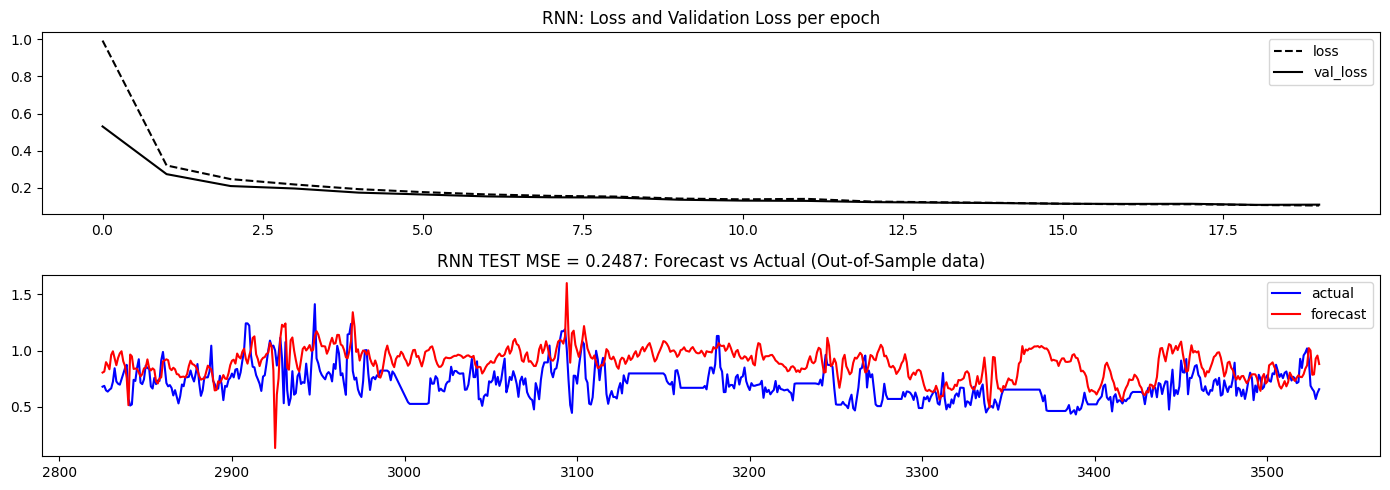

In [95]:

si_normal_rnn, history_normal_rnn = train_model_pt('RNN', **params_si)



## Inference simple RNN



## Inference sanity check first


In [96]:

model = si_normal_rnn


In [97]:


l_real, l_pred = inference_model_pt_2(model, model_type='RNN', **params_si)


0


In [98]:

l_real[:20]


[0.6802666886161242,
 0.687533324191056,
 0.6477390106939054,
 0.63629592971895,
 0.6530306007019822,
 0.6653678098821914,
 0.7236166864465916,
 0.8437999998986698,
 0.7266000111512821,
 0.7061500248625459,
 0.6979451155084329,
 0.7463277448332535,
 0.794731112479159,
 0.8431344620917419,
 0.8743949564623698,
 0.5743833492183634,
 0.5124333315398877,
 0.5222166615617724,
 0.7409999980131979,
 0.7311333179738737]

In [99]:

l_pred[:20]


[array([0.8058061], dtype=float32),
 array([0.81423825], dtype=float32),
 array([0.89805853], dtype=float32),
 array([0.87191623], dtype=float32),
 array([0.83496976], dtype=float32),
 array([0.96238655], dtype=float32),
 array([0.9947956], dtype=float32),
 array([0.9310763], dtype=float32),
 array([0.8709649], dtype=float32),
 array([0.9356413], dtype=float32),
 array([0.9761104], dtype=float32),
 array([0.9952019], dtype=float32),
 array([0.9061598], dtype=float32),
 array([0.86438924], dtype=float32),
 array([0.75855374], dtype=float32),
 array([0.5157028], dtype=float32),
 array([0.9658648], dtype=float32),
 array([0.94967073], dtype=float32),
 array([0.83772933], dtype=float32),
 array([0.84135216], dtype=float32)]

In [100]:

## plt.rcParams["figure.figsize"] = [14, 5] 


706


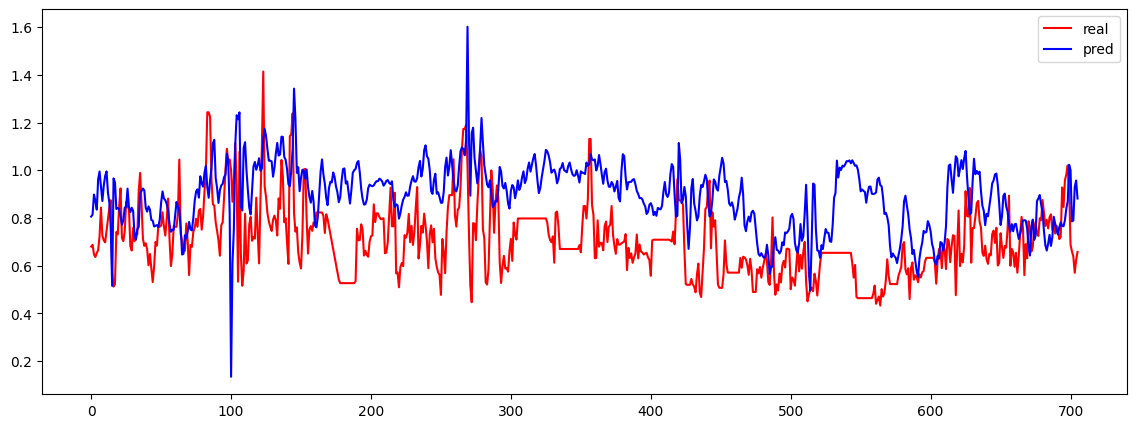

In [101]:


  
# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [102]:

model = si_normal_rnn


In [103]:

l_real, l_pred = inference_model_pt(model, model_type='RNN', **params_si)


0


In [104]:

l_real[:20]


[0.6802666886161242,
 0.687533324191056,
 0.6477390106939054,
 0.63629592971895,
 0.6530306007019822,
 0.6653678098821914,
 0.7236166864465916,
 0.8437999998986698,
 0.7266000111512821,
 0.7061500248625459,
 0.6979451155084329,
 0.7463277448332535,
 0.794731112479159,
 0.8431344620917419,
 0.8743949564623698,
 0.5743833492183634,
 0.5124333315398877,
 0.5222166615617724,
 0.7409999980131979,
 0.7311333179738737]

In [105]:

l_pred[:20]


[array([0.8058061], dtype=float32),
 array([0.81031656], dtype=float32),
 array([0.8603104], dtype=float32),
 array([0.8398589], dtype=float32),
 array([0.78312874], dtype=float32),
 array([0.6941545], dtype=float32),
 array([0.67181754], dtype=float32),
 array([0.6959232], dtype=float32),
 array([0.7942891], dtype=float32),
 array([0.89897156], dtype=float32),
 array([0.9244273], dtype=float32),
 array([0.9387429], dtype=float32),
 array([0.9431675], dtype=float32),
 array([0.8998397], dtype=float32),
 array([0.81135774], dtype=float32),
 array([0.70741904], dtype=float32),
 array([0.6469413], dtype=float32),
 array([0.68029225], dtype=float32),
 array([0.7608547], dtype=float32),
 array([1.0477872], dtype=float32)]

706


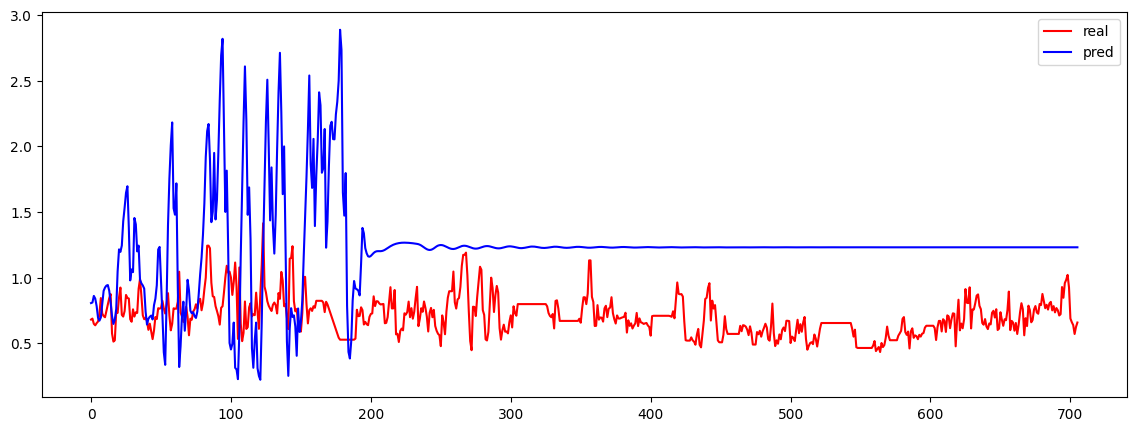

In [106]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins 

* example
* input is 30 (about 7.5 hours)
* predicts rest of week


In [107]:

model = si_normal_rnn


In [108]:

x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)




In [109]:

x_test.shape


torch.Size([706, 162])

In [110]:

bin_size = int( x_test.shape[0] / window )
bin_size 


78

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


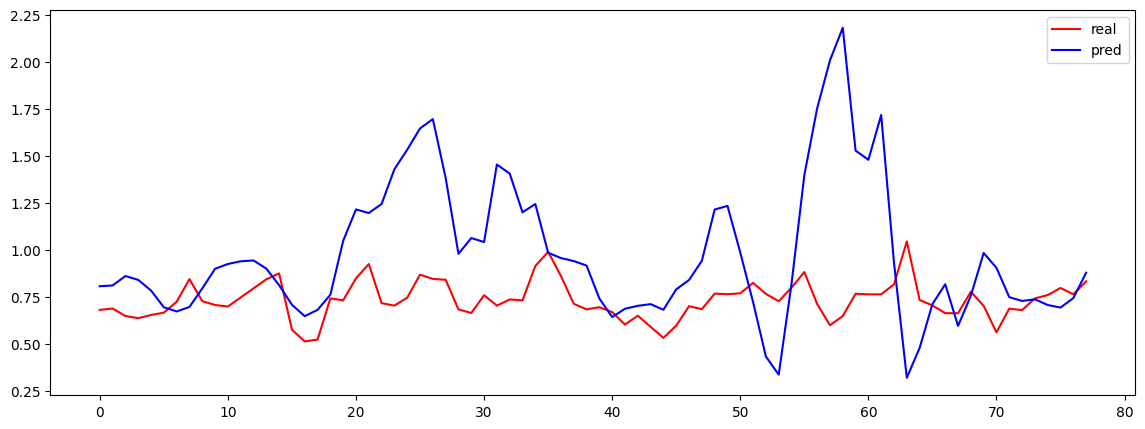

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


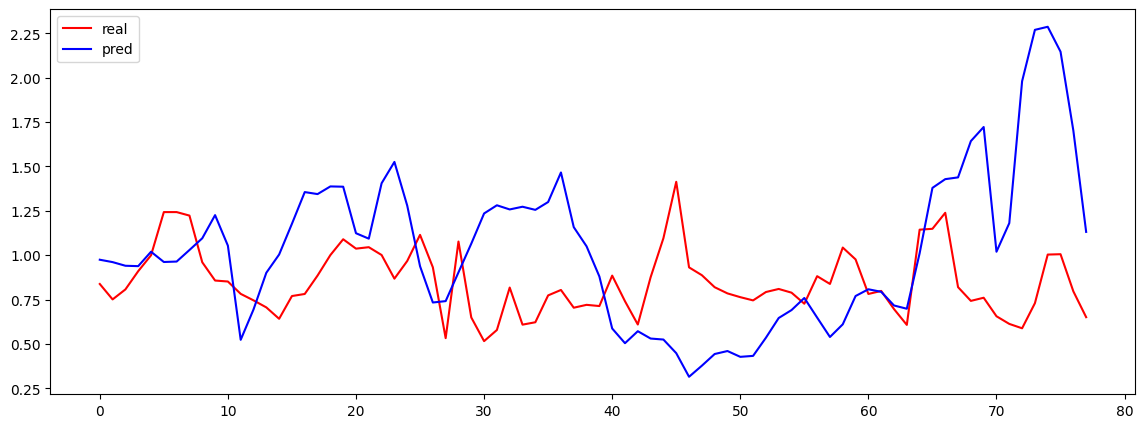

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


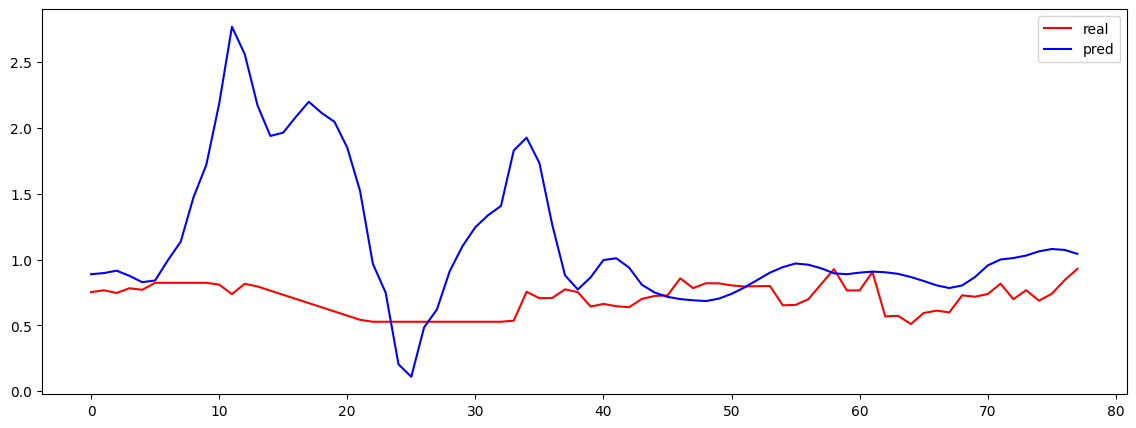

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


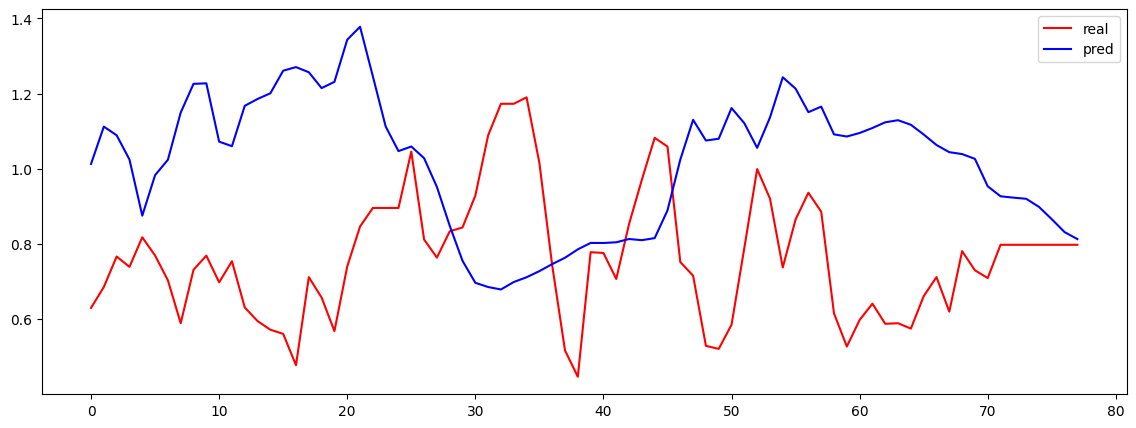

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


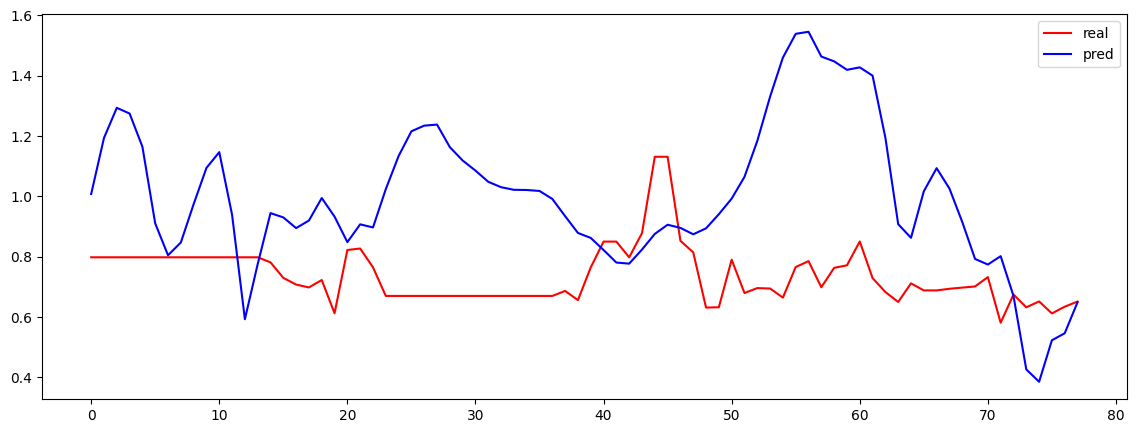

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


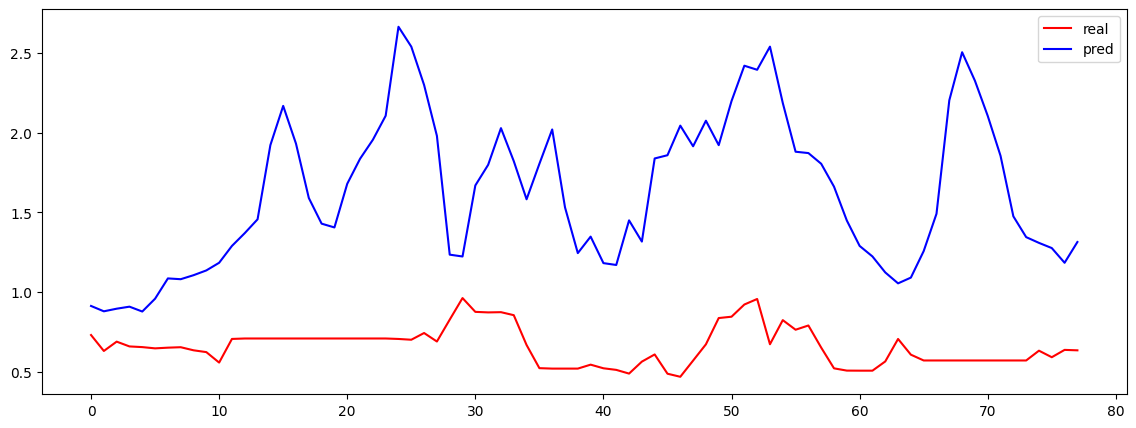

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


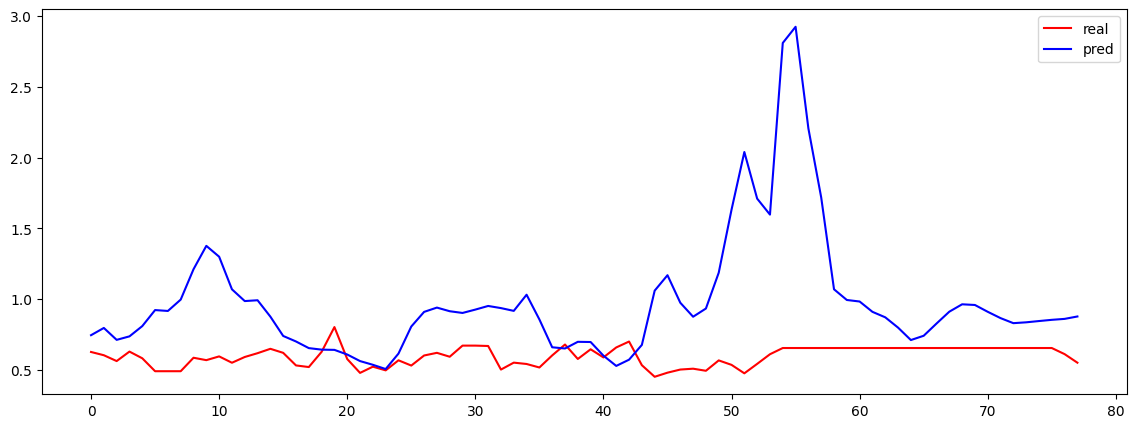

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


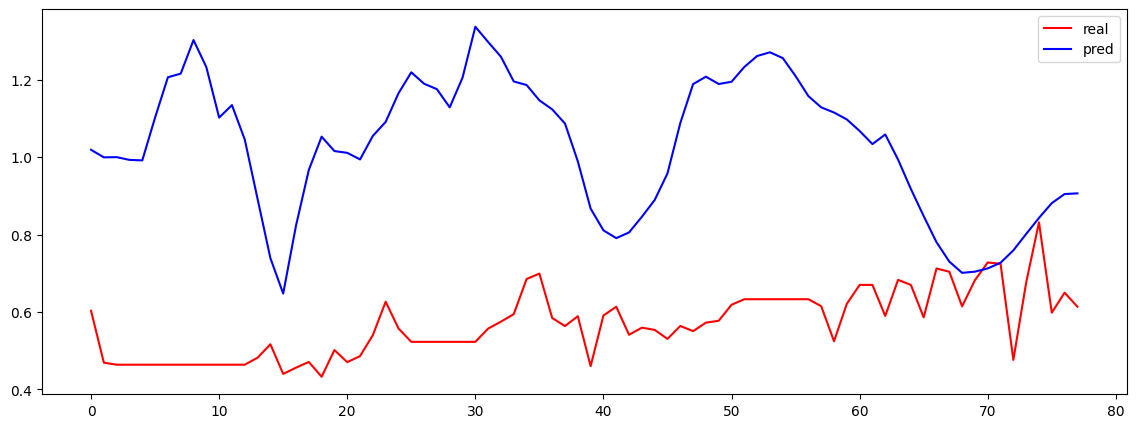

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


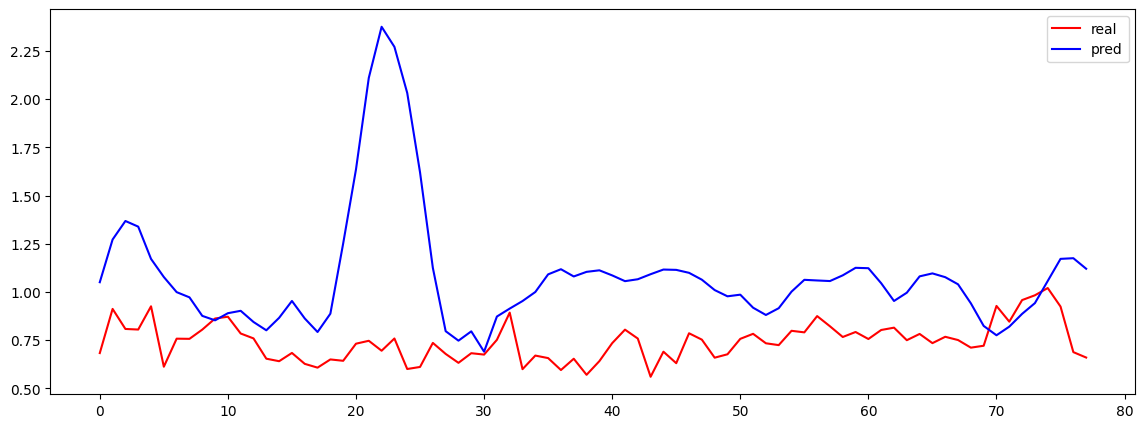

In [111]:

for i in range(0, y_test.shape[0]- bin_size, bin_size):
    batch_x_test = x_test[i:i+bin_size, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+bin_size, :]
    print( batch_y_test.shape )
    print("---------------")
    bins_inference_model_pt(model, batch_x_test, batch_y_test)




## LSTM


In [112]:

class LSTM(nn.Module):
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(LSTM, self).__init__()
        self.n_layers   = n_layers
        self.hidden_dim = n_features
        self.output_size= output_size
        self.seq_length = seq_length
        self.input_size = input_size

        self.lstm    = nn.LSTM(input_size, n_features, n_layers, batch_first=False)
        self.dropout = nn.Dropout(0.2)
        self.fc      = nn.Linear(n_features, output_size)
        
    def forward(self, x, hn):
        x = x.view(-1, self.seq_length, self.input_size)
        x = x.permute(1, 0, 2)

        ## hn is a tuple here of (h0, c0)
        lstm_o, (hn, cn) = self.lstm(x, hn)
    
        lstm_o = self.dropout(lstm_o)

        # reshape
        ## lstm_o = lstm_o.view( -1, self.hidden_dim)
        
        output = self.fc( hn )
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn


    def init_hidden(self, batch_size_x_data):
        weight = next(self.parameters()).data
        hidden = ( weight.new(self.n_layers, 1, self.hidden_dim).zero_(),
                   weight.new(self.n_layers, 1, self.hidden_dim).zero_()   )
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = ( torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim ),
                    torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )    )
        return hidden2


0/500 - Loss:  1.026417851448059, val_loss: 0.5929660201072693
25/500 - Loss:  0.3216904103755951, val_loss: 0.2613731026649475
50/500 - Loss:  0.23446644842624664, val_loss: 0.1949319988489151
75/500 - Loss:  0.19633795320987701, val_loss: 0.16928596794605255
100/500 - Loss:  0.17067401111125946, val_loss: 0.14882932603359222
125/500 - Loss:  0.15158647298812866, val_loss: 0.1330389827489853
150/500 - Loss:  0.1357039213180542, val_loss: 0.12178272008895874
175/500 - Loss:  0.12128505110740662, val_loss: 0.11051762849092484
200/500 - Loss:  0.11012883484363556, val_loss: 0.10159944742918015
225/500 - Loss:  0.09918881952762604, val_loss: 0.09255434572696686
250/500 - Loss:  0.09632685780525208, val_loss: 0.1026257574558258
275/500 - Loss:  0.086124487221241, val_loss: 0.07785997539758682
300/500 - Loss:  0.07904907315969467, val_loss: 0.07110127806663513
325/500 - Loss:  0.07428941875696182, val_loss: 0.06455370783805847
350/500 - Loss:  0.07088015228509903, val_loss: 0.06149373576045

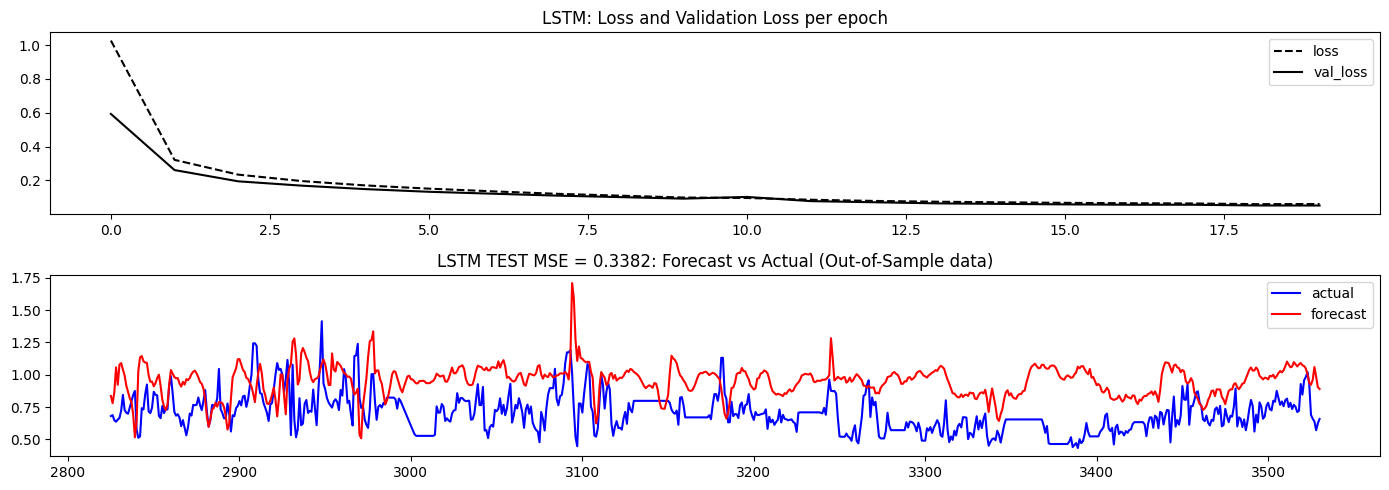

In [113]:

si_lstm, history_a_lstm = train_model_pt('LSTM', **params_si)



## LSTM Inference



## Inference sanity check first


In [114]:

model = si_lstm


In [115]:

l_real, l_pred = inference_model_pt_2(model, model_type='LSTM', **params_si)


0


In [116]:

l_real[:20]


[0.6802666886161242,
 0.687533324191056,
 0.6477390106939054,
 0.63629592971895,
 0.6530306007019822,
 0.6653678098821914,
 0.7236166864465916,
 0.8437999998986698,
 0.7266000111512821,
 0.7061500248625459,
 0.6979451155084329,
 0.7463277448332535,
 0.794731112479159,
 0.8431344620917419,
 0.8743949564623698,
 0.5743833492183634,
 0.5124333315398877,
 0.5222166615617724,
 0.7409999980131979,
 0.7311333179738737]

In [117]:

l_pred[:20]


[array([0.8356554], dtype=float32),
 array([0.77935195], dtype=float32),
 array([0.86445177], dtype=float32),
 array([1.0572312], dtype=float32),
 array([0.92224306], dtype=float32),
 array([1.0785065], dtype=float32),
 array([1.0896313], dtype=float32),
 array([1.039186], dtype=float32),
 array([0.99447536], dtype=float32),
 array([0.91479504], dtype=float32),
 array([0.86761725], dtype=float32),
 array([0.8189957], dtype=float32),
 array([0.78921115], dtype=float32),
 array([0.6904408], dtype=float32),
 array([0.51546377], dtype=float32),
 array([0.6470891], dtype=float32),
 array([1.0299947], dtype=float32),
 array([1.1342716], dtype=float32),
 array([1.1443504], dtype=float32),
 array([1.1044229], dtype=float32)]

706


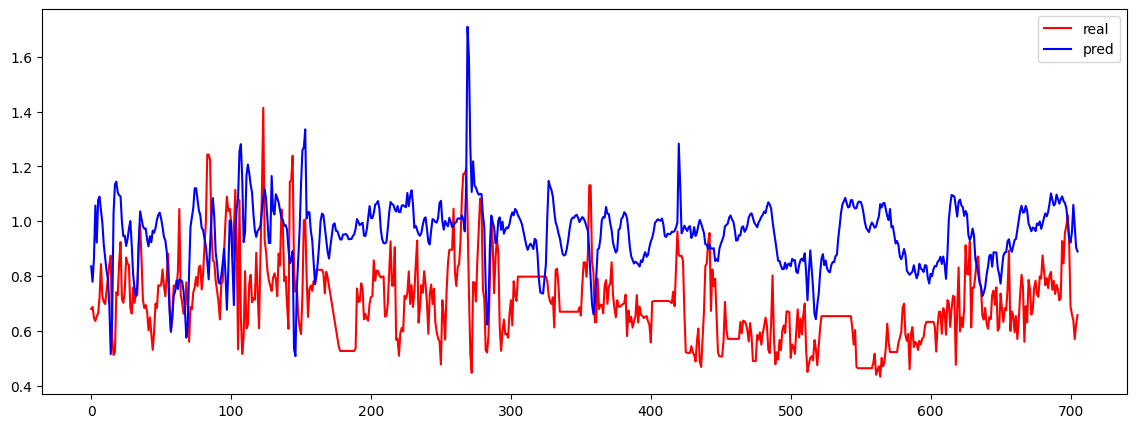

In [118]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [119]:

model = si_lstm


In [120]:

l_real, l_pred = inference_model_pt(model, model_type='LSTM', **params_si)


0


In [121]:

l_real[:50]


[0.6802666886161242,
 0.687533324191056,
 0.6477390106939054,
 0.63629592971895,
 0.6530306007019822,
 0.6653678098821914,
 0.7236166864465916,
 0.8437999998986698,
 0.7266000111512821,
 0.7061500248625459,
 0.6979451155084329,
 0.7463277448332535,
 0.794731112479159,
 0.8431344620917419,
 0.8743949564623698,
 0.5743833492183634,
 0.5124333315398877,
 0.5222166615617724,
 0.7409999980131979,
 0.7311333179738737,
 0.848133335206033,
 0.9240000241568747,
 0.7159333548844306,
 0.7029500117524999,
 0.7450666565447293,
 0.867700013283125,
 0.8449516619851554,
 0.8404166780635542,
 0.6825483367352306,
 0.663549978822484,
 0.7580499996766598,
 0.7029166501055369,
 0.7357374777212857,
 0.730937512156185,
 0.9137500233022763,
 0.989000022209007,
 0.8601654566330962,
 0.7124428790459343,
 0.68310001214274,
 0.6941833283301755,
 0.6685999944399033,
 0.6020000123744014,
 0.6491500099938909,
 0.5899500018912368,
 0.5312333229031245,
 0.5965833432401975,
 0.6998000050462532,
 0.6842333704067025,
 0.

In [122]:

l_pred[:500]


[array([0.8356554], dtype=float32),
 array([0.8918142], dtype=float32),
 array([0.9589797], dtype=float32),
 array([1.0927954], dtype=float32),
 array([1.0616614], dtype=float32),
 array([0.98835677], dtype=float32),
 array([0.7711046], dtype=float32),
 array([0.6679674], dtype=float32),
 array([0.832914], dtype=float32),
 array([0.97401994], dtype=float32),
 array([0.98295295], dtype=float32),
 array([1.0164093], dtype=float32),
 array([1.1257243], dtype=float32),
 array([1.1685399], dtype=float32),
 array([1.0923471], dtype=float32),
 array([1.006868], dtype=float32),
 array([0.92319214], dtype=float32),
 array([0.88367933], dtype=float32),
 array([0.8806414], dtype=float32),
 array([0.8697126], dtype=float32),
 array([0.811375], dtype=float32),
 array([0.76091075], dtype=float32),
 array([0.75797546], dtype=float32),
 array([0.7838273], dtype=float32),
 array([0.8298675], dtype=float32),
 array([0.96807915], dtype=float32),
 array([1.1935859], dtype=float32),
 array([1.4151604], dty

706


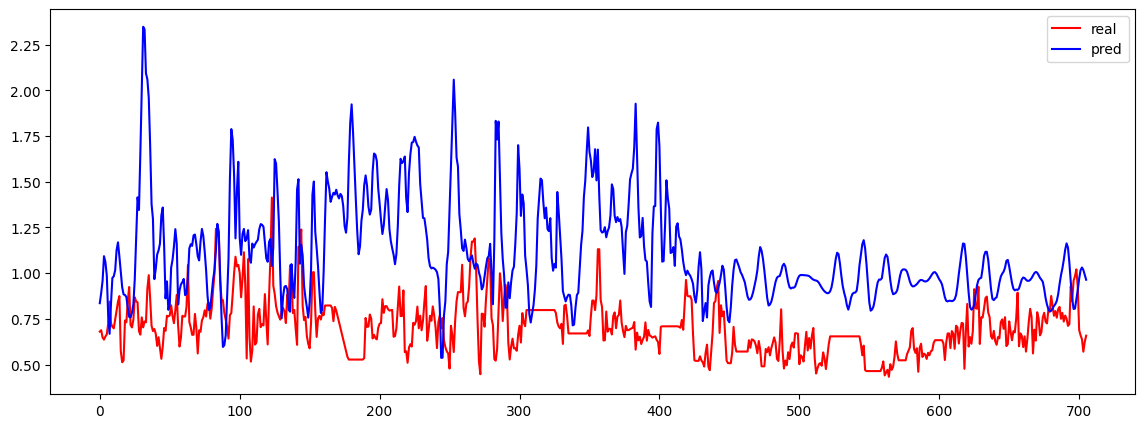

In [123]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Break up test set into test bins 

* example
* input is 30 (about 7.5 hours)
* predicts rest of week


In [124]:

model = si_lstm


In [125]:


x_test, y_test   = params_si['test_data']

## l_real, l_pred = bins_inference_model_pt(model, x_test, y_test)



In [126]:

x_test.shape


torch.Size([706, 162])

In [127]:

bin_size = int( x_test.shape[0] / window )
bin_size 


78

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


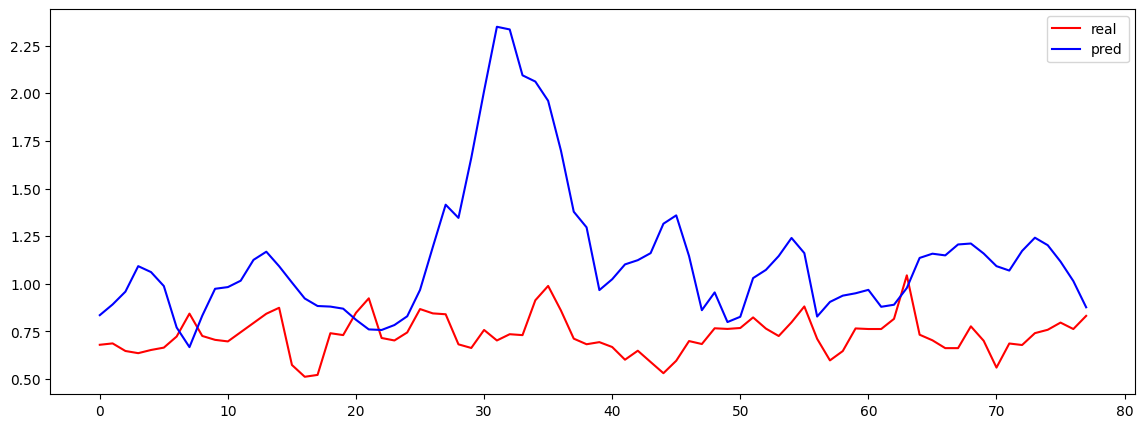

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


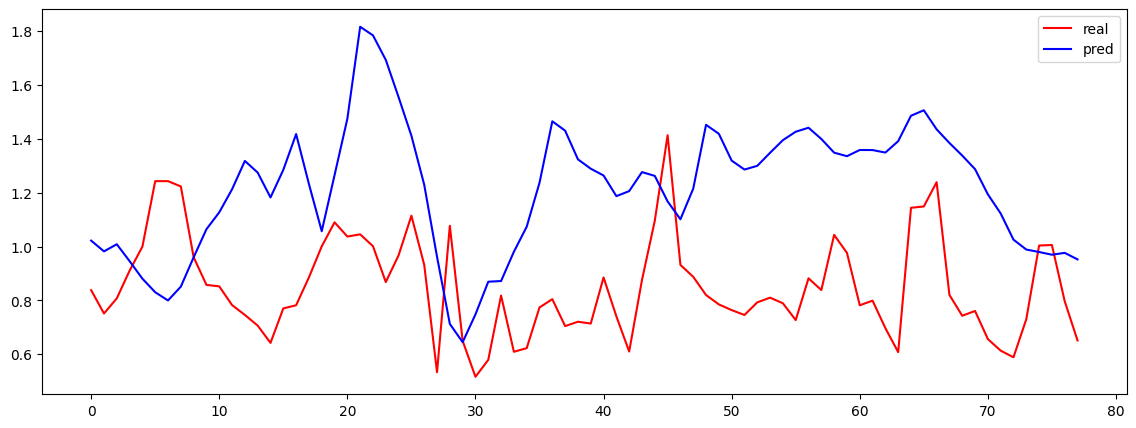

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


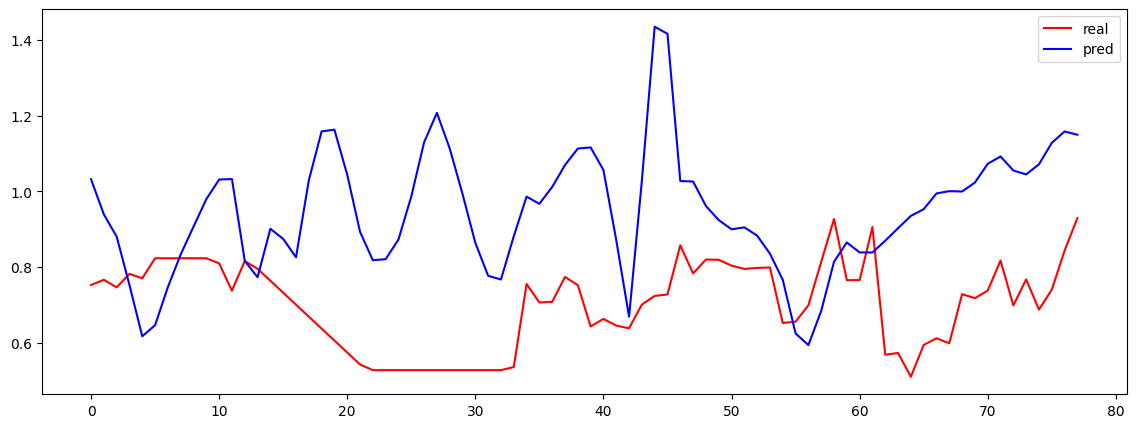

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


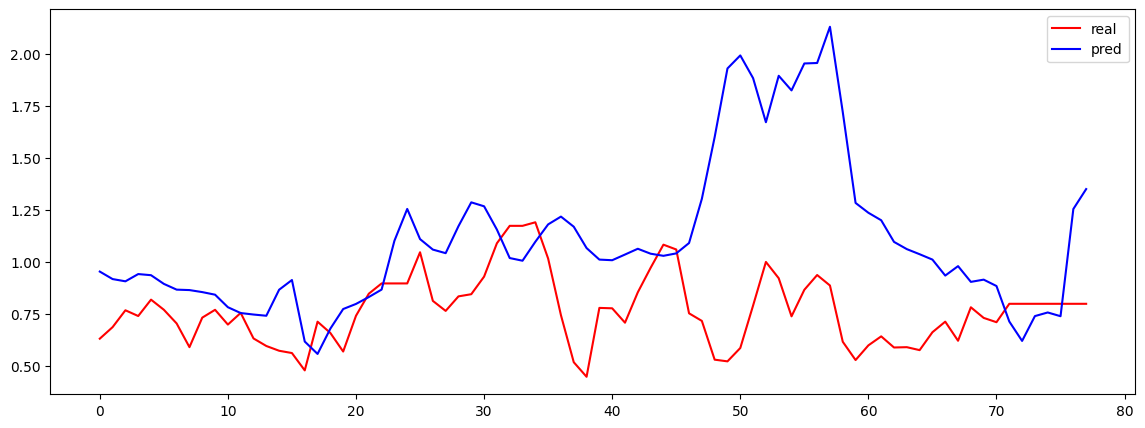

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


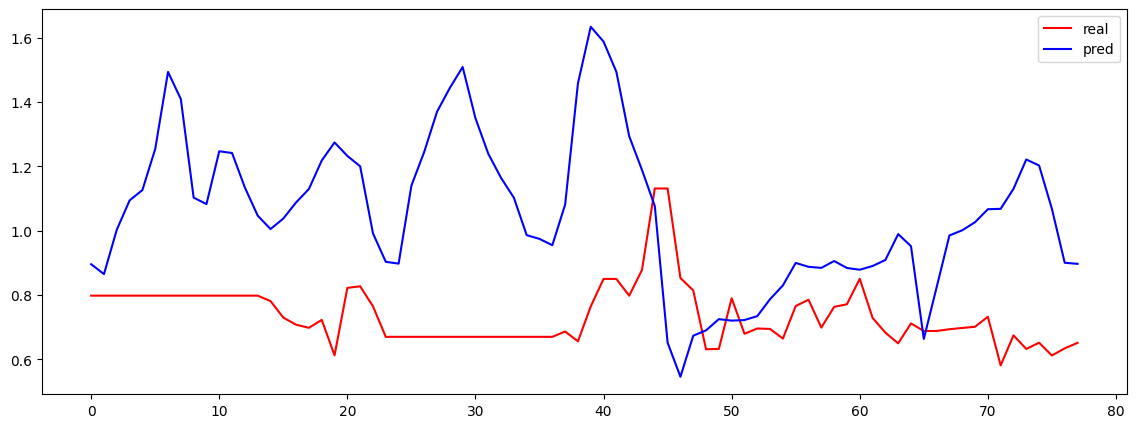

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


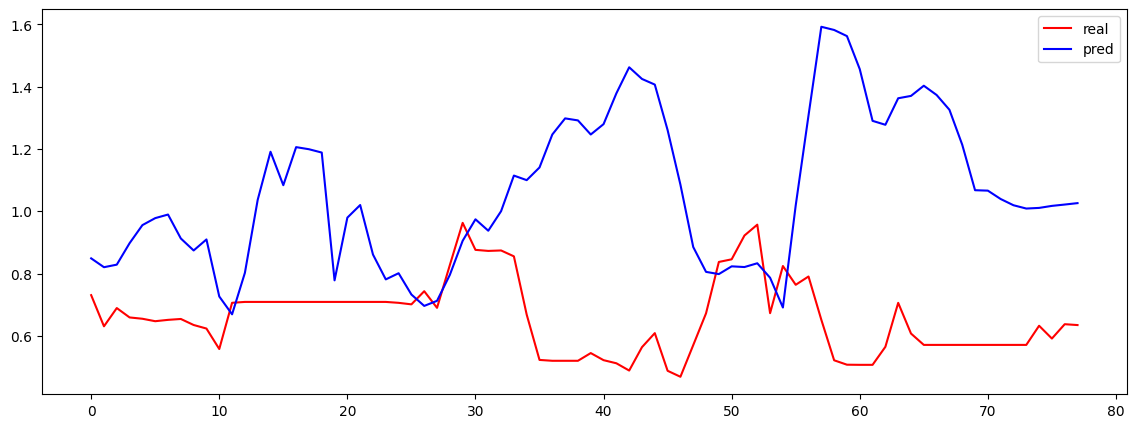

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


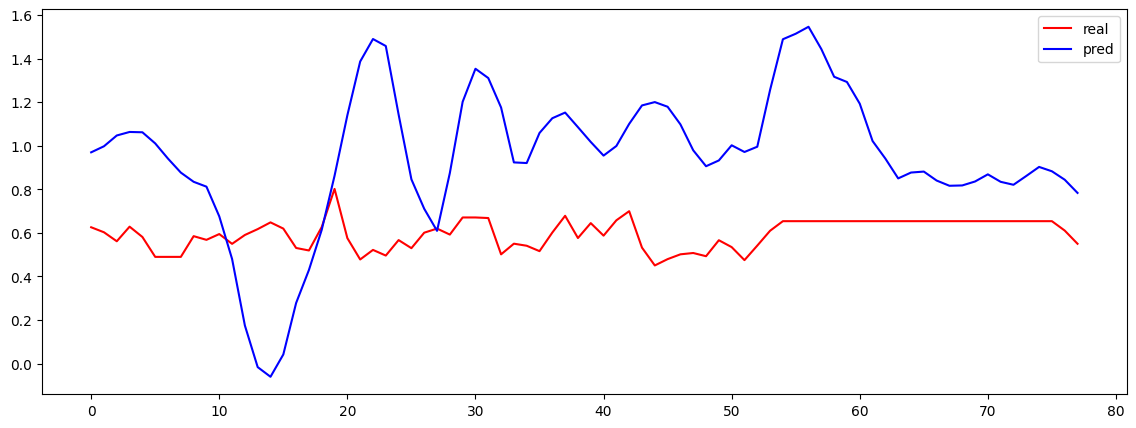

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


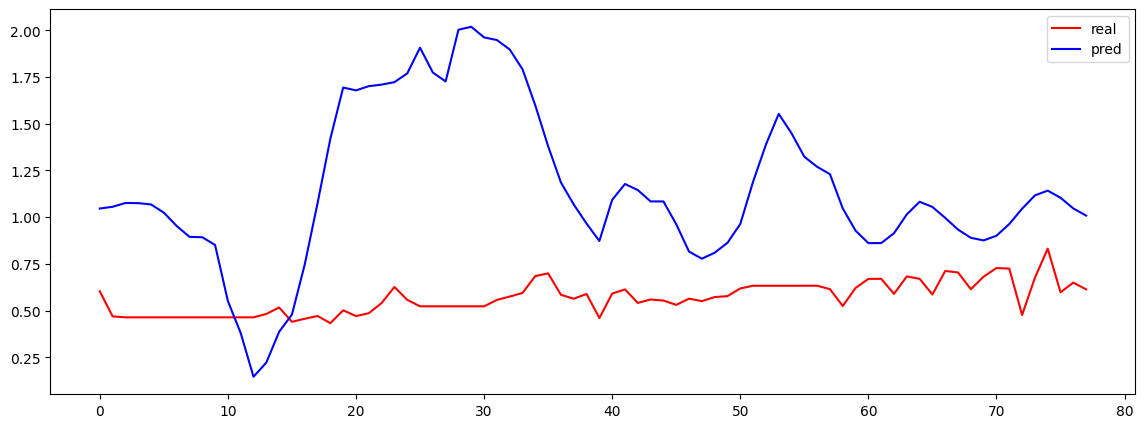

torch.Size([78, 162])
torch.Size([78, 19])
---------------
0
78


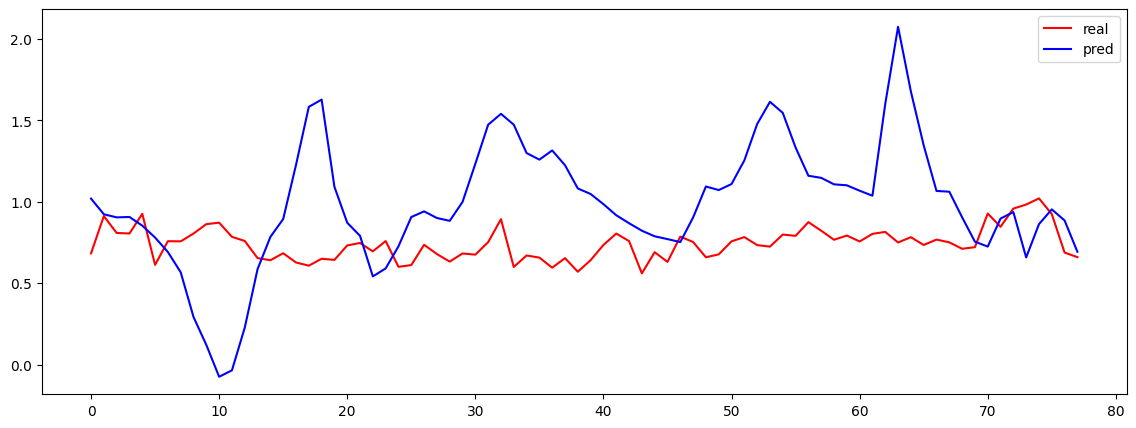

In [128]:



for i in range(0, y_test.shape[0]- bin_size, bin_size):
    batch_x_test = x_test[i:i+bin_size, :]
    print( batch_x_test.shape )

    batch_y_test = y_test[i:i+bin_size, :]
    print( batch_y_test.shape )
    print("---------------")
    bins_inference_model_pt(model, batch_x_test, batch_y_test)



## View all predicted Xs


In [129]:


            
            
def View_all_predicted_Xs(x_index, model, model_type='RNN', **kwargs):
 
    x_test, y_test   = kwargs['test_data']
 
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
 
    ## Plotting
    fig, ax = plt.subplots(2, 1) 
    
    ax[0].set_title(f"{model_type} TEST MSE = {0:.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, x_index]
    pred   =   pred[:, x_index]
    
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return 0, 0
    
           

            



ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


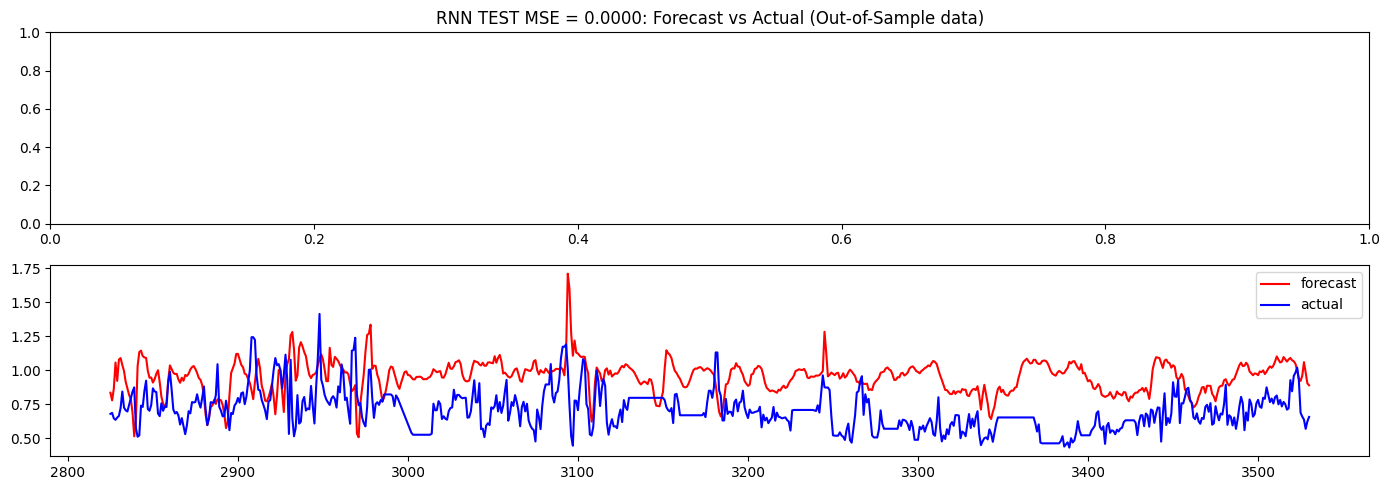

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


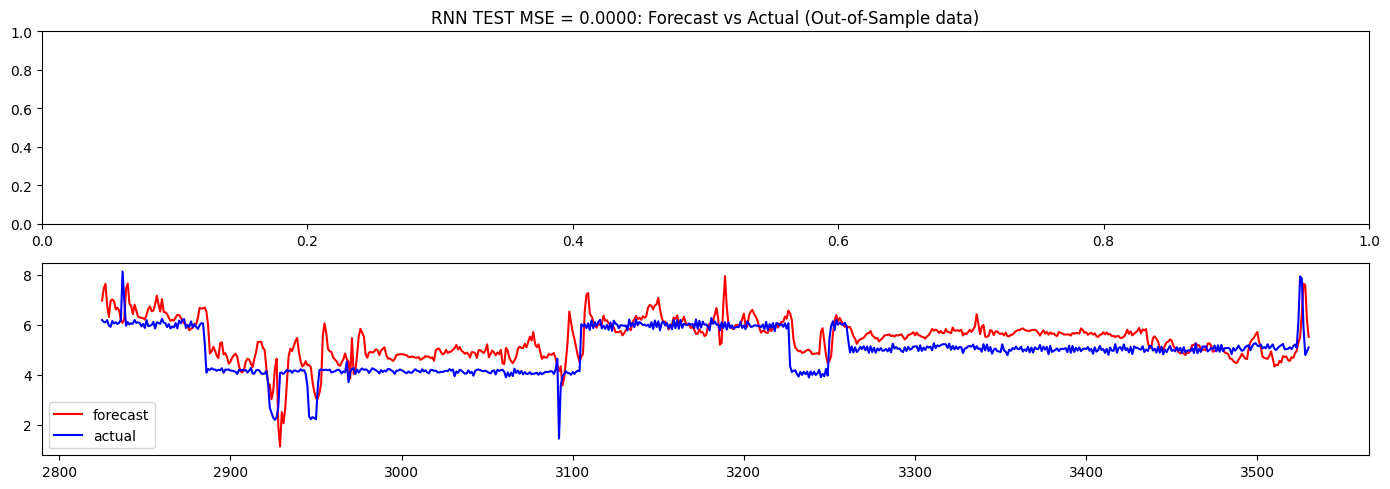

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


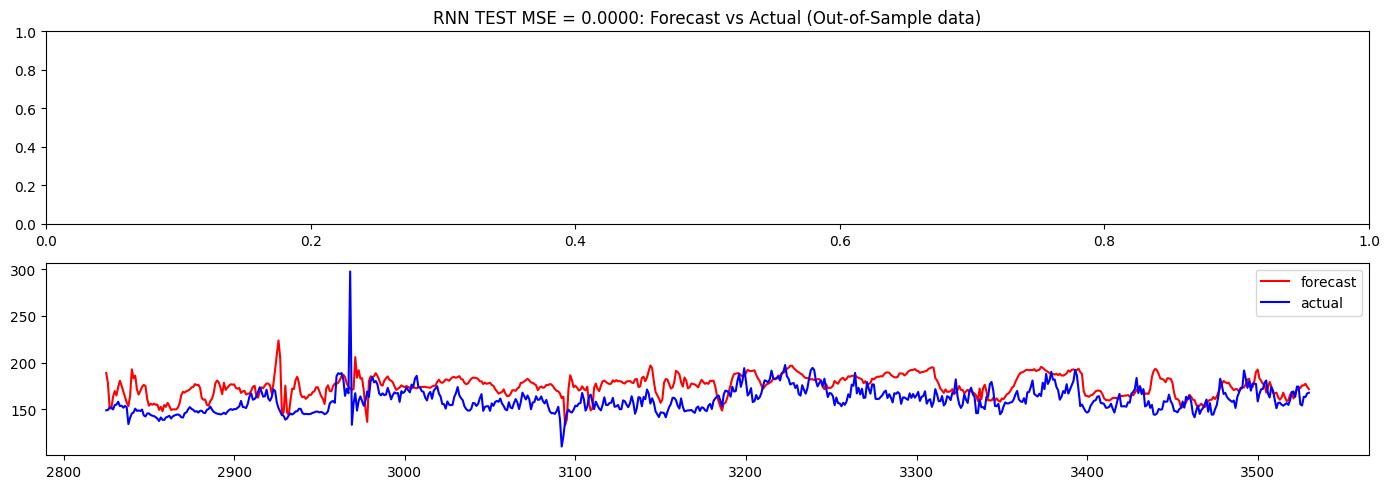

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


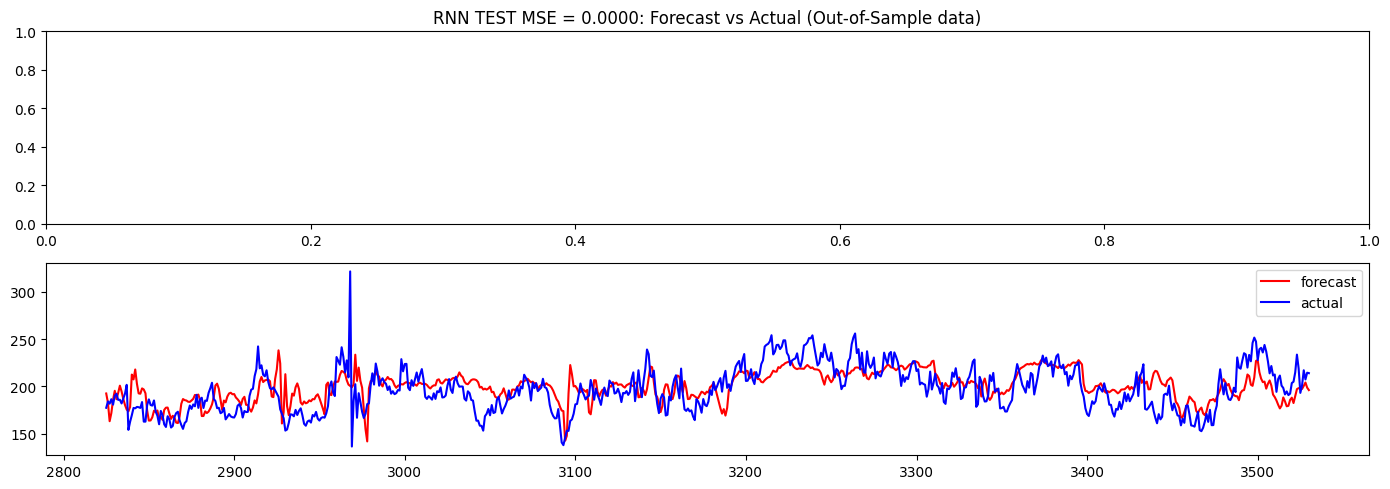

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


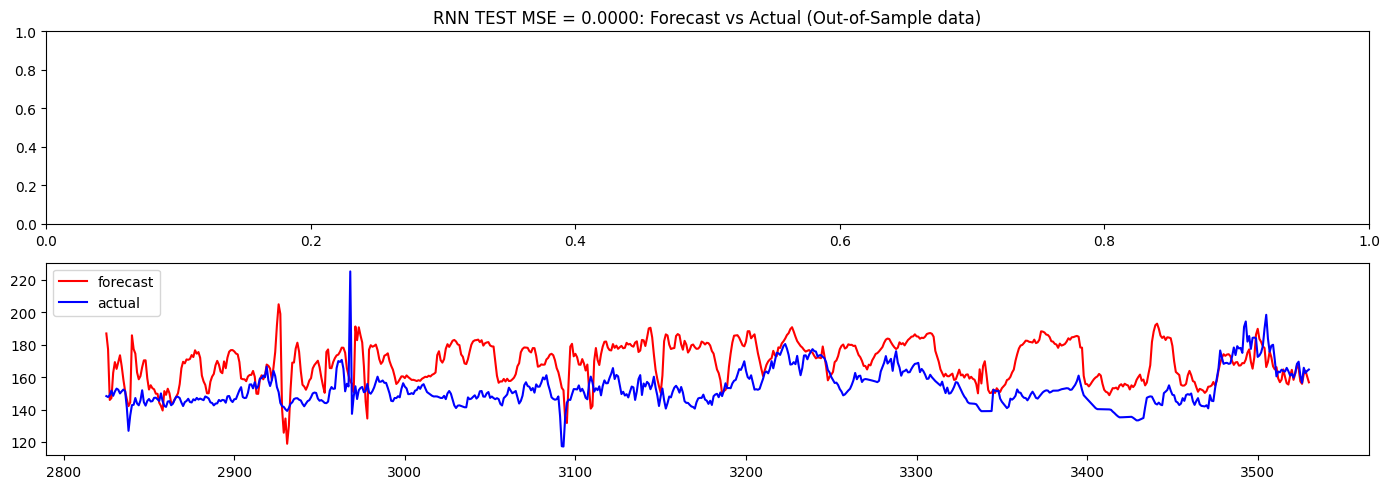

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


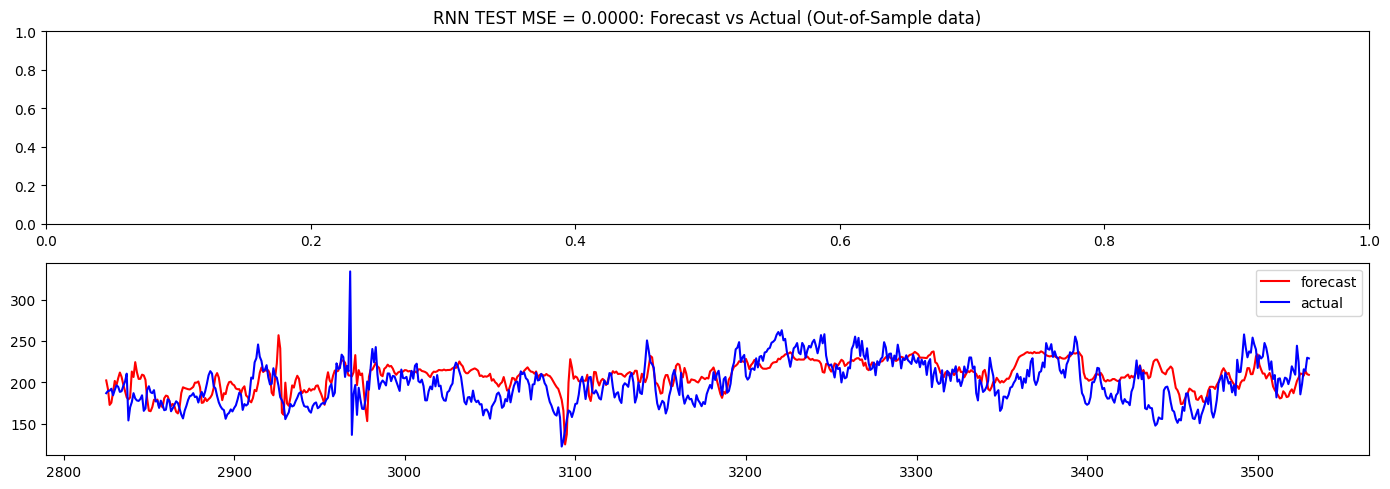

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


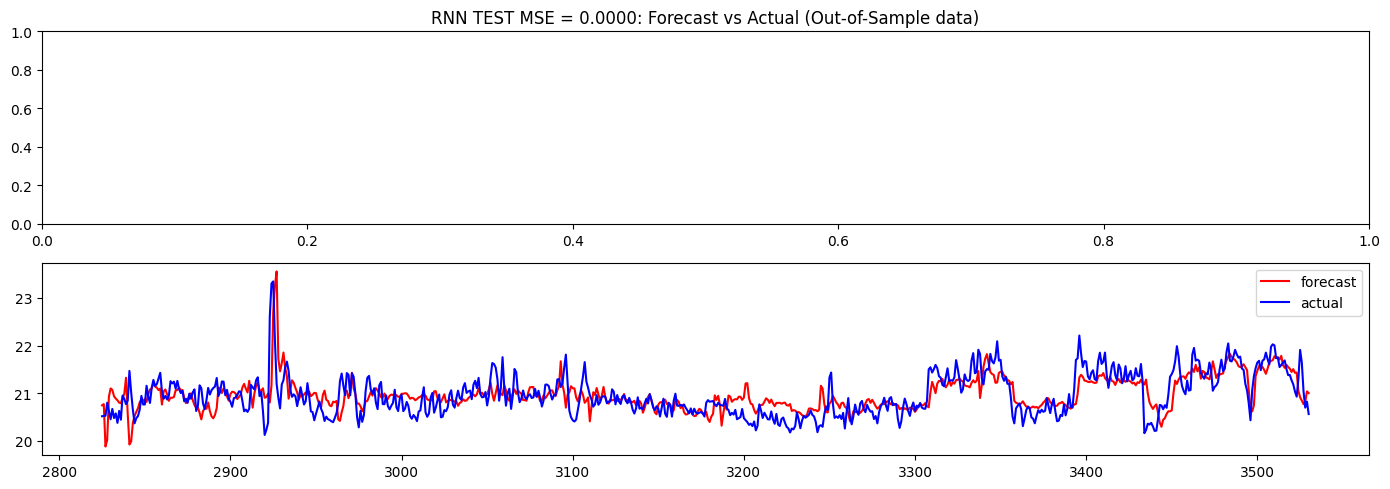

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


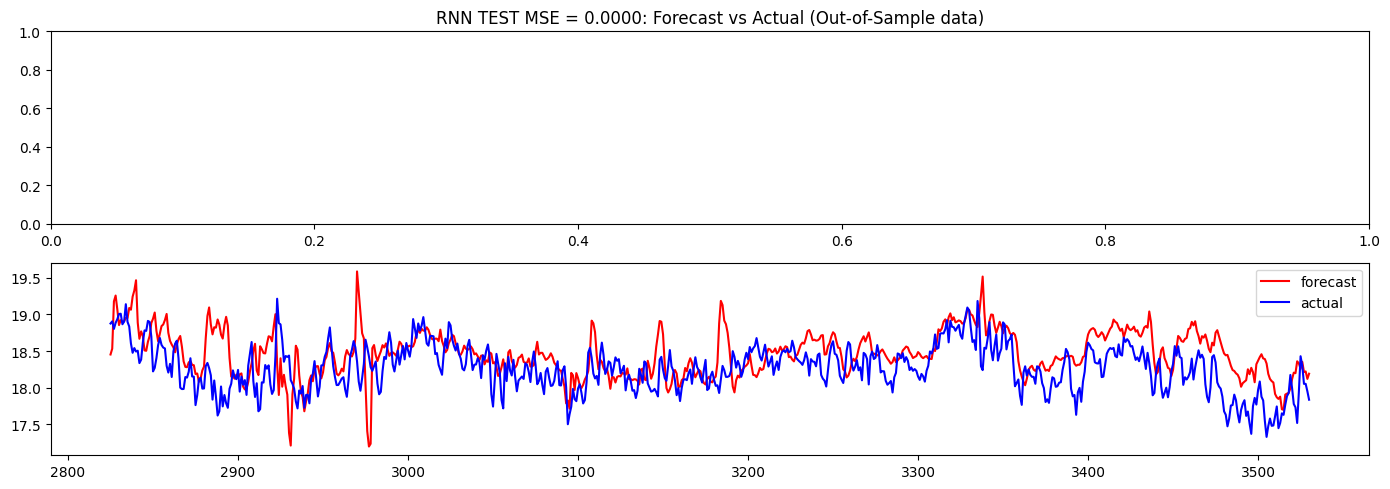

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


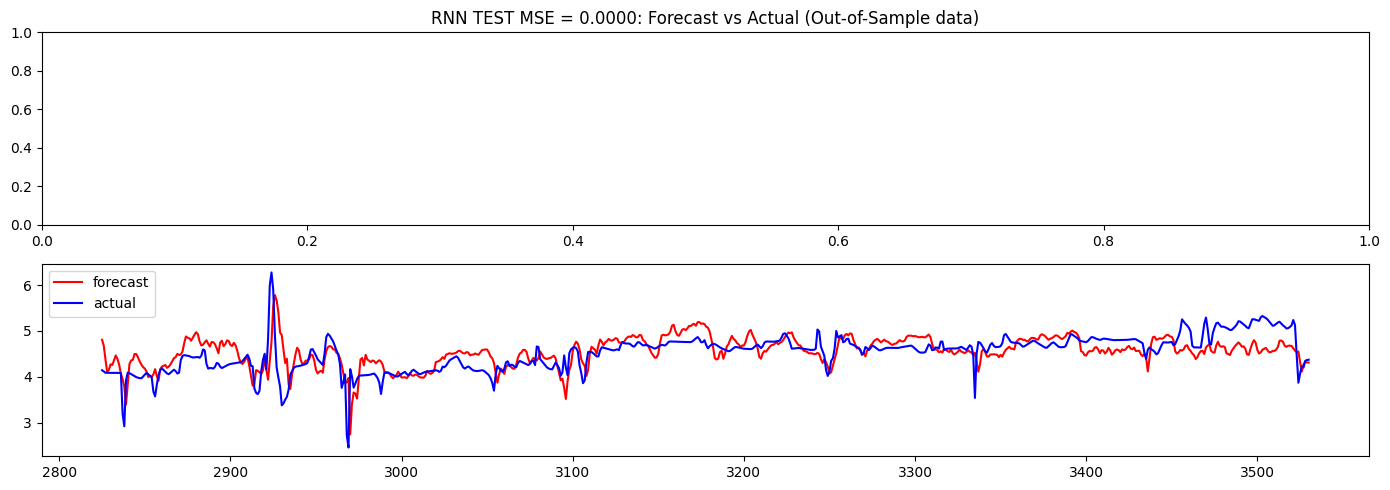

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


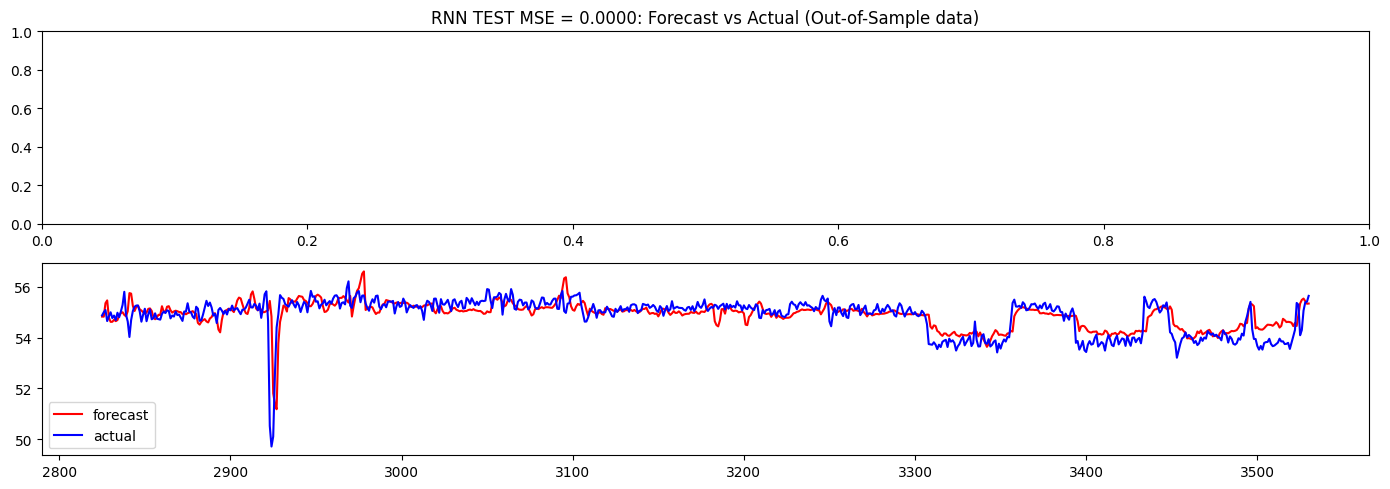

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


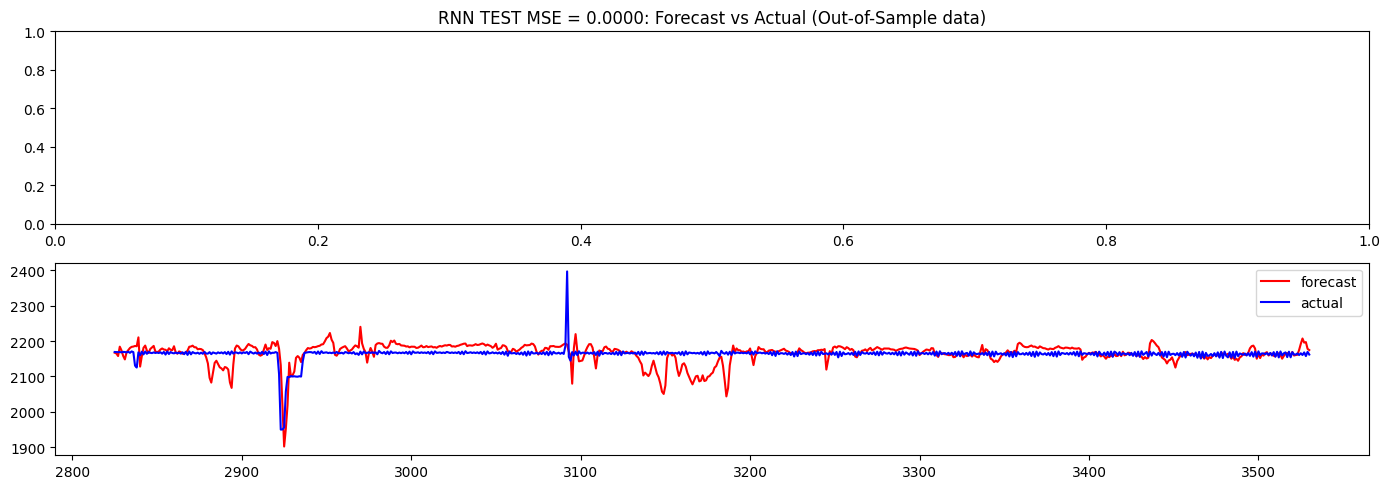

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


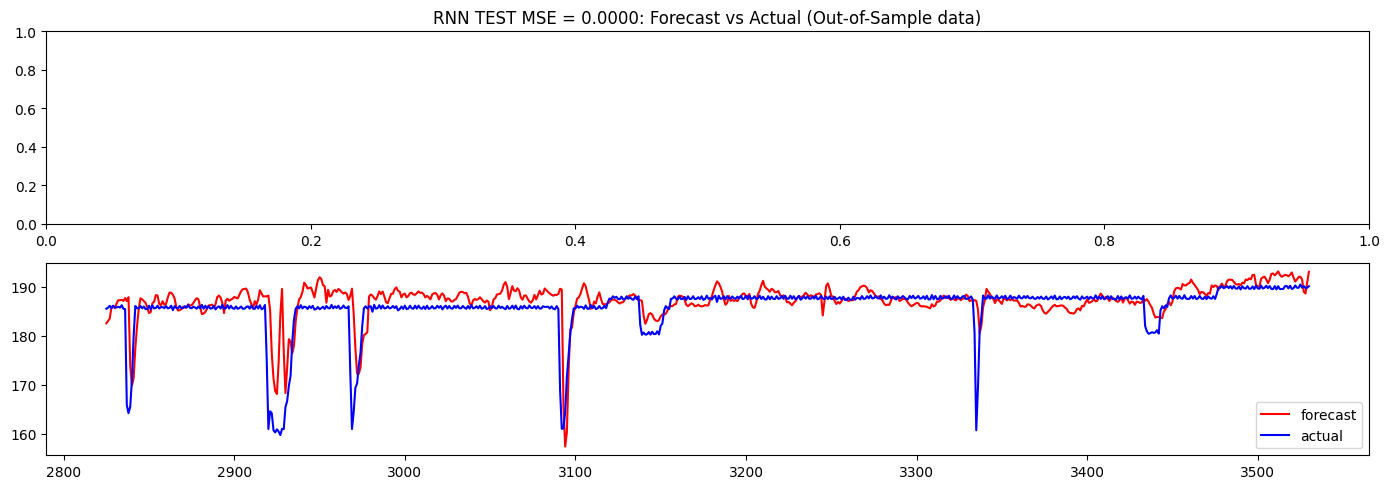

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


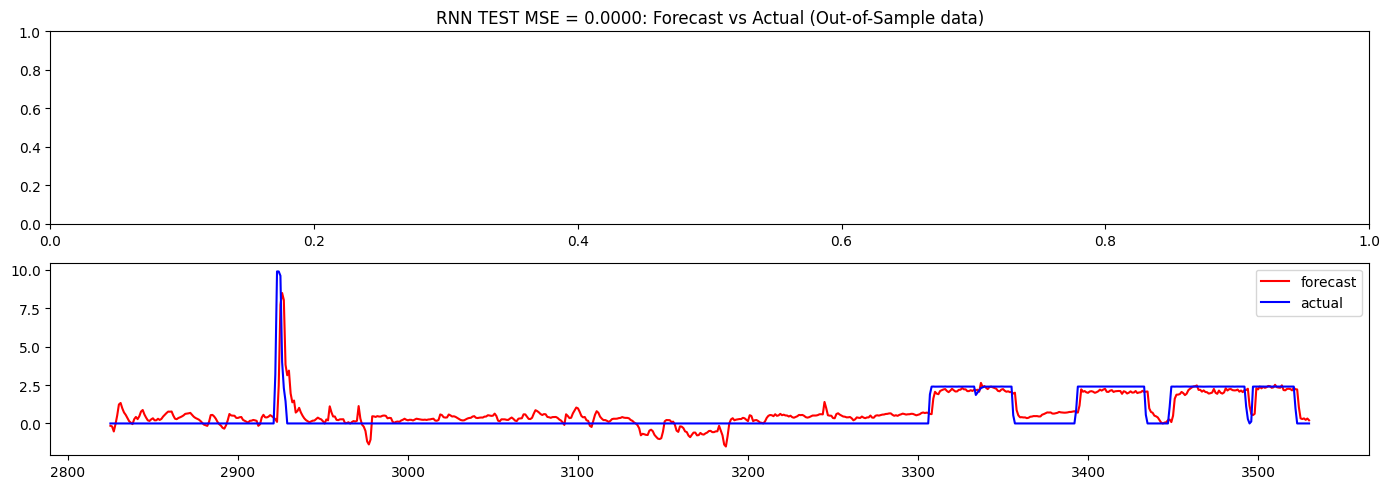

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


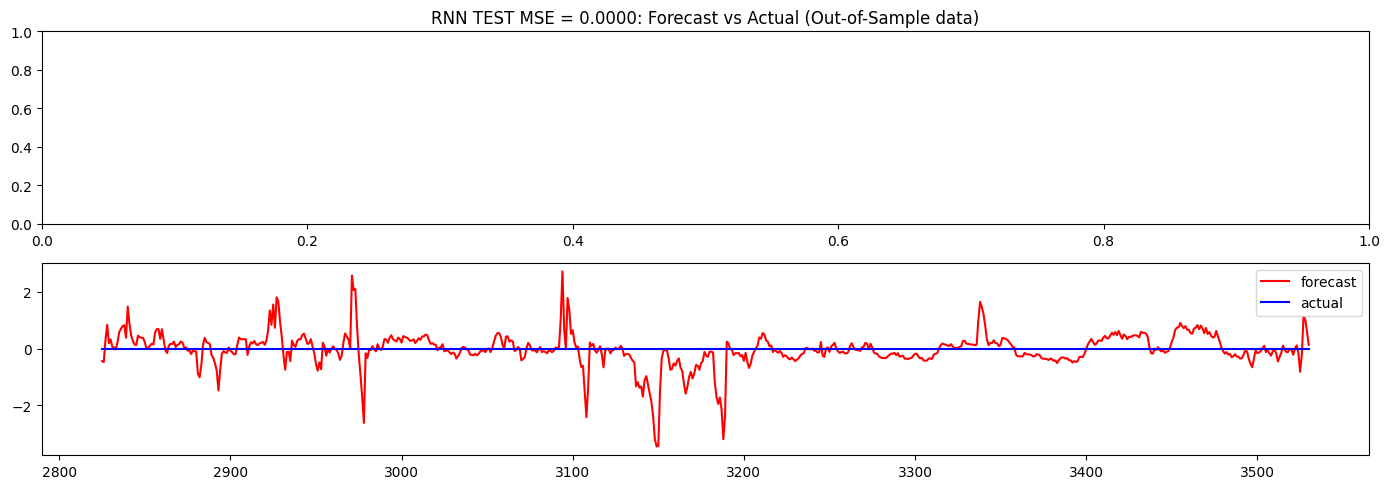

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


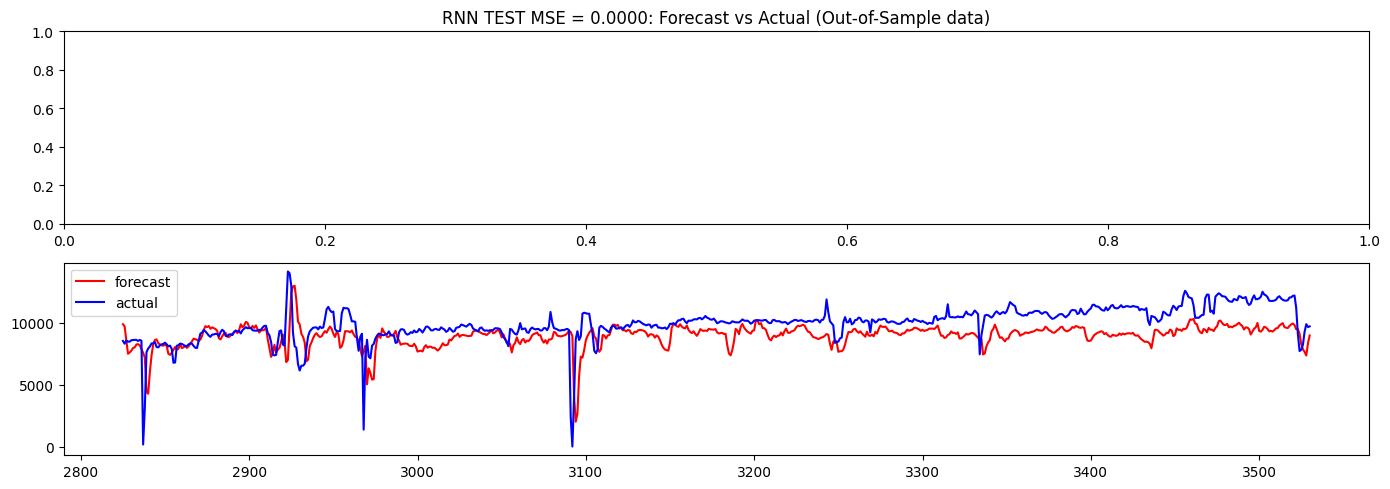

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


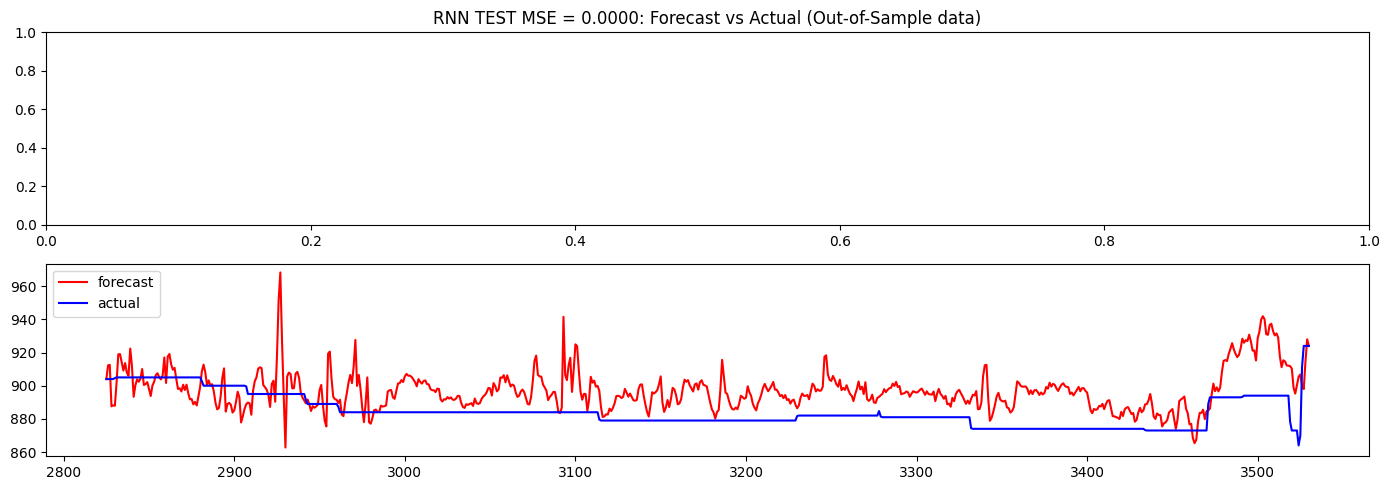

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


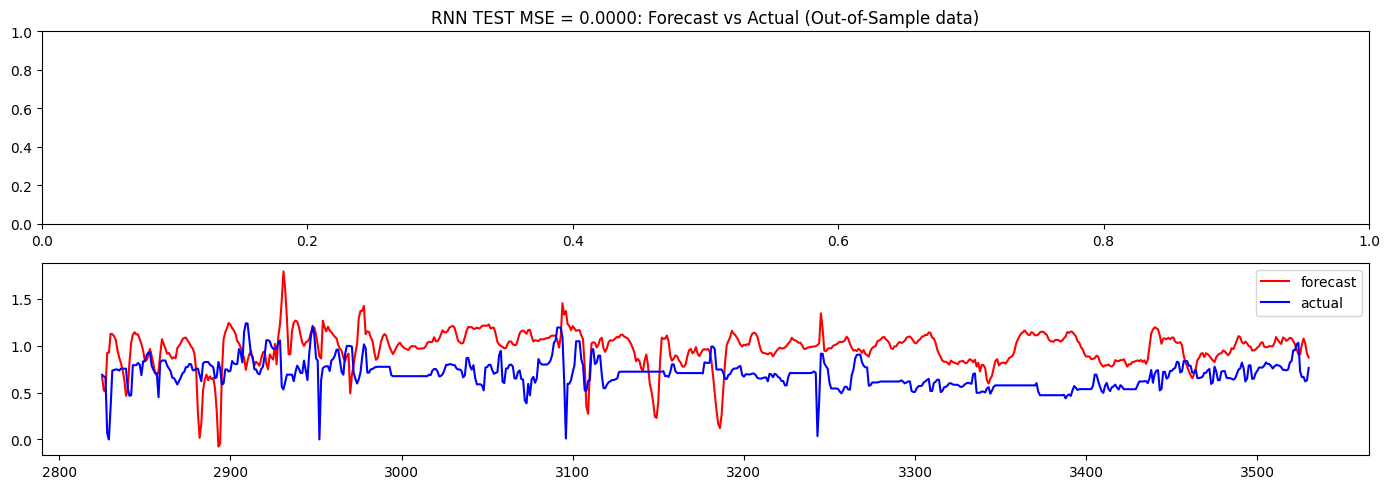

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


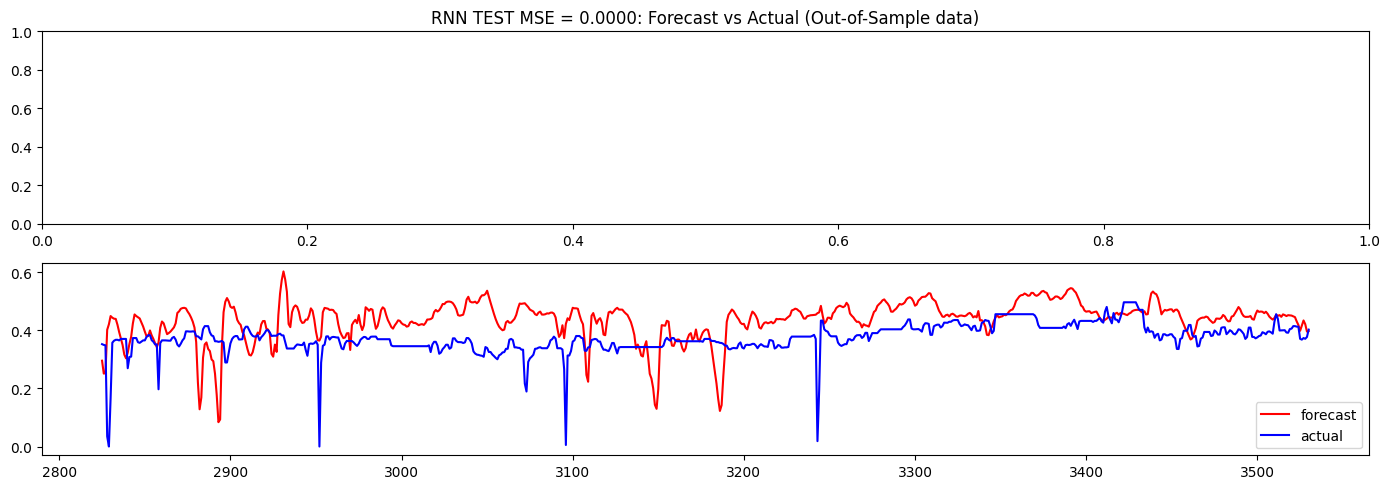

ricardo check this
torch.Size([706, 19])
torch.Size([706, 19])
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(181,)
(181,)
(19,)
(19,)
(706, 19)
(1, 19)
(1, 19)
(706, 19)
(706, 19)


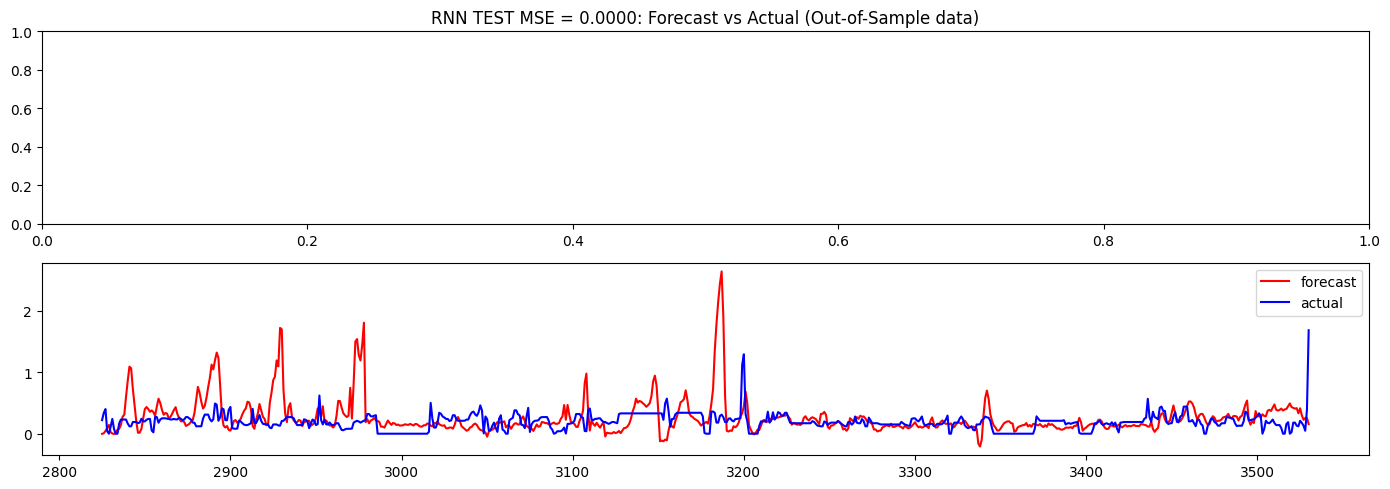

In [130]:

for i in range(19):

    x_index = i

    l1, l2 = View_all_predicted_Xs(x_index, model, model_type='RNN', **params_si )            
